In [152]:
#Импорт sklearn
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor
#Импорт numpy и pandas
import numpy as np
import pandas as pd
from pandas import read_excel, DataFrame, Series
from numpy.random import seed


#Импорт matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf

#Импорт seaborn
import seaborn as sb

#Импорт plotly
import plotly.express as px



#Импорт joblib
from joblib import dump, load

#Импорт scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'tensorflow'

In [57]:
DataF1 = pd.read_excel('C:/ESD/X_clean.xlsx')#Загрузка чистого датасета
DataF1.drop(['Unnamed: 0'], axis=1, inplace=True)#Удаление столбца
DataF1.shape#Проверка размерности

(926, 13)

In [58]:
DataF1.corr()#Поиск кореляции

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.005504   
модуль упругости, ГПа                                        0.049910   
Количество отвердителя, м.%                                  0.003969   
Содержание эпоксидных групп,%_2                              0.023834   
Температура вспышки, С_2                                    -0.008536   
Поверхностная плотность, г/м2                                0.011675   
Модуль упругости при растяжении, ГПа                        -0.026694   
Прочность при растяжении, МПа                                0.023550   
Потребление смолы, г/м2                                      0.074926   
Угол нашивки, град                                          -0.033784   
Шаг нашивки                                                  0.036905   
Плотность нашивки                                            0.049060   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.005504               0.049910   
Плотность, кг/м3                              1.000000               0.001303   
модуль упругости, ГПа                         0.001303               1.000000   
Количество отвердителя, м.%                  -0.051965               0.043327   
Содержание эпоксидных групп,%_2               0.004350              -0.000682   
Температура вспышки, С_2                     -0.022796               0.034568   
Поверхностная плотность, г/м2                 0.061442              -0.006727   
Модуль упругости при растяжении, ГПа         -0.014301               0.021232   
Прочность при растяжении, МПа                -0.078511               0.033958   
Потребление смолы, г/м2                      -0.009771               0.007146   
Угол нашивки, град                           -0.051552              -0.031199   
Шаг нашивки                                  -0.045528               0.011484   
Плотность нашивки                             0.085970               0.076559   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                          0.003969   
Плотность, кг/м3                                        -0.051965   
модуль упругости, ГПа                                    0.043327   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                          0.010752   
Температура вспышки, С_2                                 0.065849   
Поверхностная плотность, г/м2                            0.041044   
Модуль упругости при растяжении, ГПа                    -0.056787   
Прочность при растяжении, МПа                           -0.062819   
Потребление смолы, г/м2                                 -0.019212   
Угол нашивки, град                                       0.032415   
Шаг нашивки                                             -0.023263   
Плотность нашивки                                        0.001731   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.023834   
Плотность, кг/м3                                             0.004350   
модуль упругости, ГПа                                       -0.000682   
Количество отвердителя, м.%                                  0.010752   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.023505   
Поверхностная плотность, г/м2                               -0.015259   
Модуль упругости при растяжении, ГПа                         0.053162   
Прочность при растяжении, МПа                               -0.006017   
Потребление смолы, г/м2                                      0.013488   
Угол нашивки, град                                           0.031329   
Шаг нашивки                          

In [59]:
result = DataF1.describe()
result.T

count         mean         std  \
Соотношение матрица-наполнитель       926.0     2.929274    0.895390   
Плотность, кг/м3                      926.0  1974.170536   70.990093   
модуль упругости, ГПа                 926.0   737.009604  327.500184   
Количество отвердителя, м.%           926.0   111.187428   26.858401   
Содержание эпоксидных групп,%_2       926.0    22.206999    2.392457   
Температура вспышки, С_2              926.0   286.119813   39.448903   
Поверхностная плотность, г/м2         926.0   482.856530  280.019061   
Модуль упругости при растяжении, ГПа  926.0    73.303258    3.022385   
Прочность при растяжении, МПа         926.0  2465.104089  456.587308   
Потребление смолы, г/м2               926.0   218.012213   57.382666   
Угол нашивки, град                    926.0     0.509719    0.500176   
Шаг нашивки                           926.0     6.927157    2.515853   
Плотность нашивки                     926.0    57.539052   11.140738   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.547391     2.325756     2.906630   
Плотность, кг/м3                      1784.482245  1923.318006  1977.450684   
модуль упругости, ГПа                    2.436909   499.321940   738.164864   
Количество отвердителя, м.%             38.668500    92.856591   111.183627   
Содержание эпоксидных групп,%_2         15.695894    20.563359    22.178471   
Температура вспышки, С_2               179.374391   259.155596   286.220763   
Поверхностная плотность, г/м2            0.603740   265.027350   460.339294   
Модуль упругости при растяжении, ГПа    65.793845    71.241213    73.247594   
Прочность при растяжении, МПа         1250.392802  2150.188224  2457.959767   
Потребление смолы, г/м2                 64.524180   179.875097   218.697660   
Угол нашивки, град                       0.000000     0.000000     1.000000   
Шаг нашивки                              0.037639     5.137253     6.972862   
Плотность нашивки                       28.382477    50.275385    57.609295   

                                              75%          max  
Соотношение матрица-наполнитель          3.549367     5.314144  
Плотность, кг/м3                      2020.259524  2161.565216  
модуль упругости, ГПа                  957.391294  1628.000000  
Количество отвердителя, м.%            130.164820   181.828448  
Содержание эпоксидных групп,%_2         23.960300    28.955094  
Температура вспышки, С_2               313.012786   386.067992  
Поверхностная плотность, г/м2          695.531920  1291.340115  
Модуль упругости при растяжении, ГПа    75.310130    81.203147  
Прочность при растяжении, МПа         2751.946540  3660.450210  
Потребление смолы, г/м2                256.772672   359.052220  
Угол нашивки, град                       1.000000     1.000000  
Шаг нашивки                              8.612094    13.732404  
Плотность нашивки                       64.798593    86.012427

In [60]:
# Нормализация данных

In [61]:
#Копирование датасета.
DataF1_norm = DataF1.copy()

<AxesSubplot:ylabel='Density'>

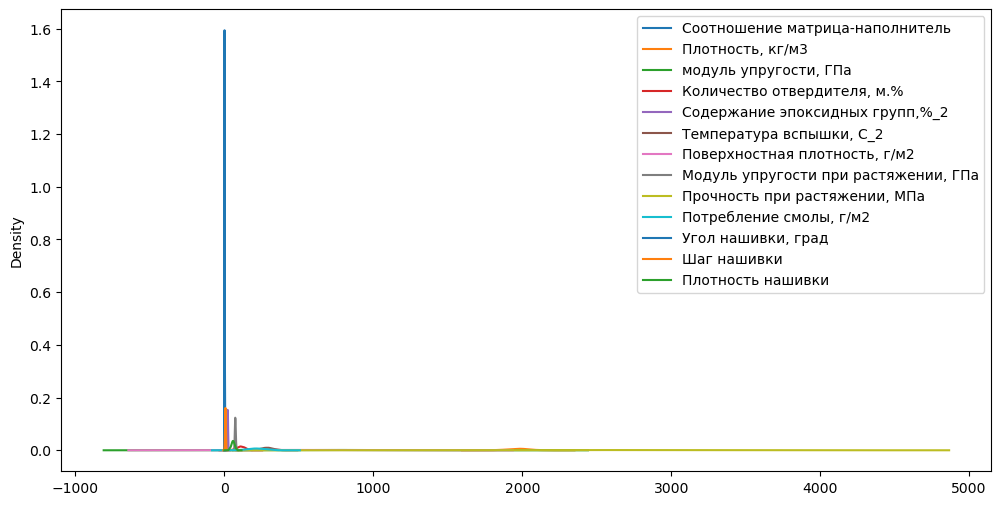

In [62]:
#Оценка плотности
fig, ax = plt.subplots(figsize = (12, 6))
DataF1_norm.plot(kind = 'kde', ax = ax)

In [63]:
#Нормализация MinMaxScaler() 
scaler = preprocessing.MinMaxScaler()
col = DataF1_norm.columns
result = scaler.fit_transform(DataF1_norm)
minmax = pd.DataFrame(result, columns = col)
minmax.describe()


Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       926.000000        926.000000   
mean                          0.499687          0.503041   
std                           0.187841          0.188261   
min                           0.000000          0.000000   
25%                           0.373077          0.368184   
50%                           0.494936          0.511740   
75%                           0.629774          0.625266   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             926.000000                   926.000000   
mean                0.451888                     0.506559   
std                 0.201469                     0.187611   
min                 0.000000                     0.000000   
25%                 0.305669                     0.378514   
50%                 0.452599                     0.506532   
75%                 0.587461                     0.639120   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       926.000000                926.000000   
mean                          0.491063                  0.516443   
std                           0.180438                  0.190857   
min                           0.000000                  0.000000   
25%                           0.367101                  0.385988   
50%                           0.488912                  0.516931   
75%                           0.623296                  0.646553   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     926.000000                            926.000000   
mean                        0.373626                              0.487330   
std                         0.216945                              0.196140   
min                         0.000000                              0.000000   
25%                         0.204863                              0.353512   
50%                         0.356181                              0.483718   
75%                         0.538397                              0.617568   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                     926.000000               926.000000   
mean                        0.504018                 0.521132   
std                         0.189451                 0.194829   
min                         0.000000                 0.000000   
25%                         0.373350                 0.391647   
50%                         0.501053                 0.523459   
75%                         0.623037                 0.652734   
max                         1.000000                 1.000000   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count          926.000000   926.000000         926.000000  
mean             0.509719     0.503077           0.505927  
std              0.500176     0.183709           0.193315  
min              0.000000     0.000000           0.000000  
25%              0.000000     0.372377           0.379888  
50%              1.000000     0.506414           0.507146  
75%              1.000000     0.626112           0.631896  
max              1.000000     1.000000           1.000000

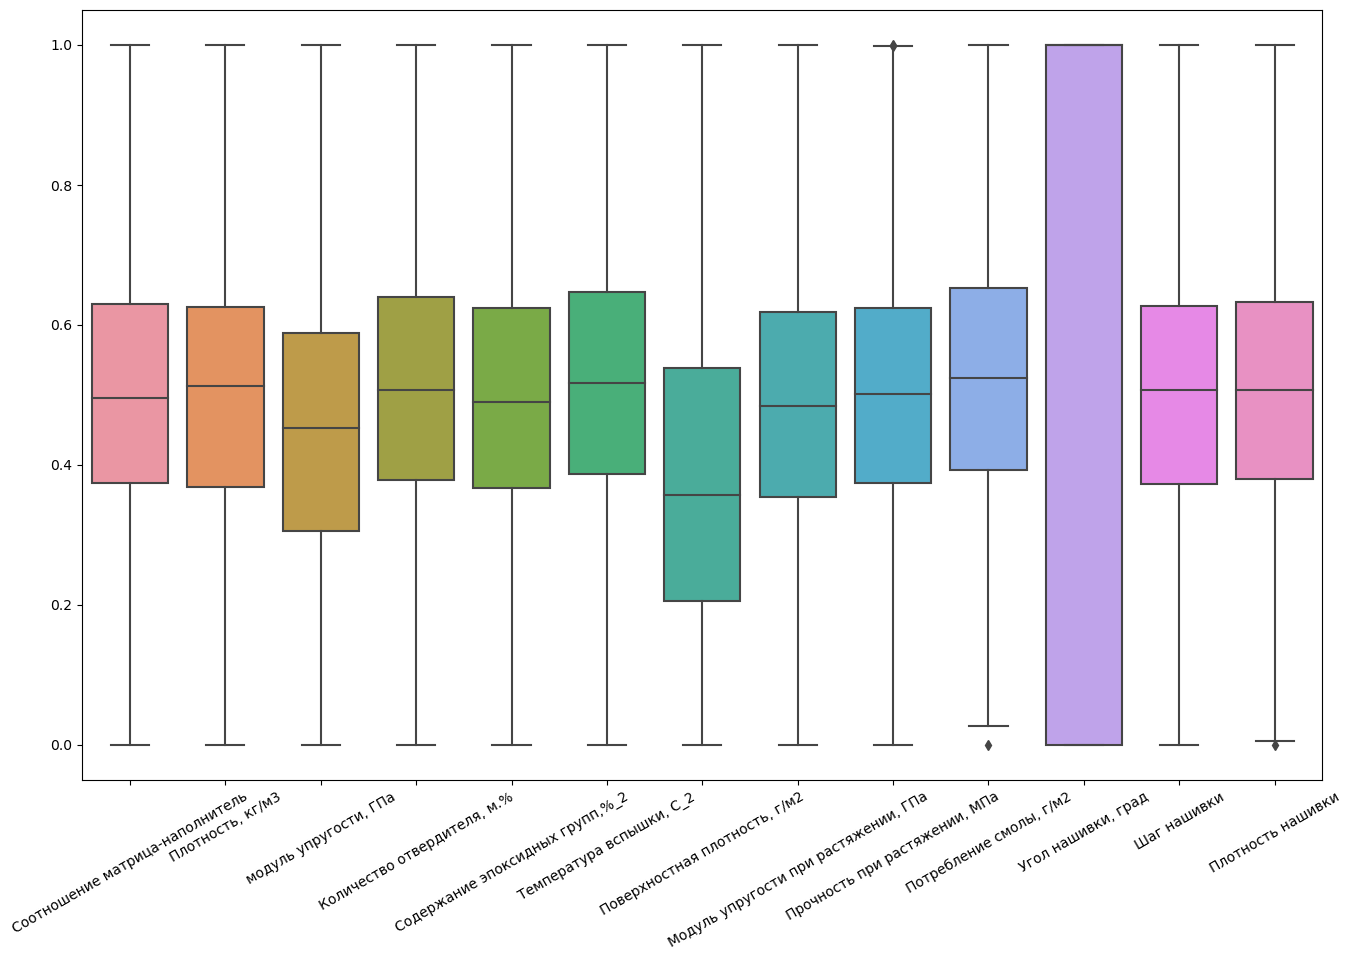

In [64]:
#отображает распределения minmax
plt.figure(figsize = (16,10))
ax = sb.boxplot(data = minmax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);
plt.show()

<AxesSubplot:ylabel='Density'>

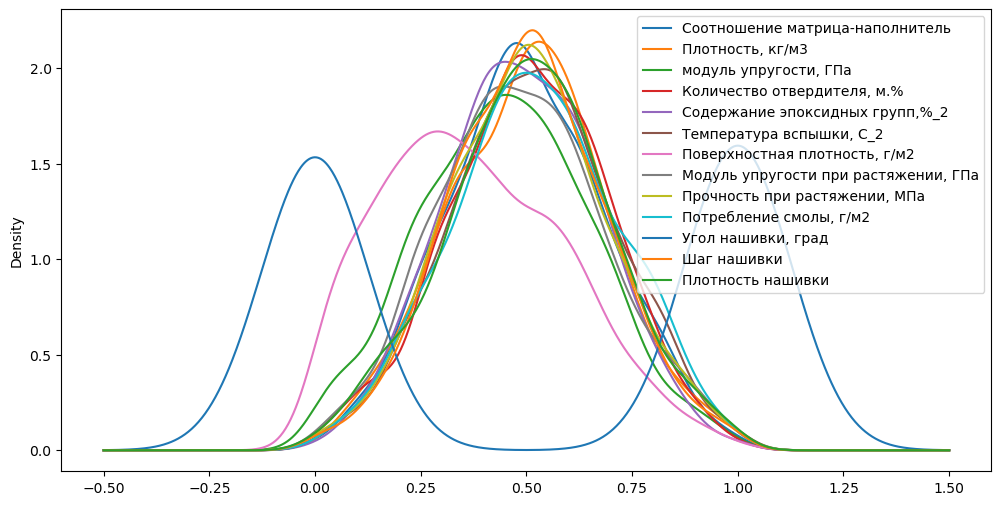

In [65]:
#график плотности распределения
fig, ax = plt.subplots(figsize = (12, 6))
minmax.plot(kind = 'kde', ax = ax)

In [66]:
#матрица рассеяния (pairplot) до датафрейму minmax

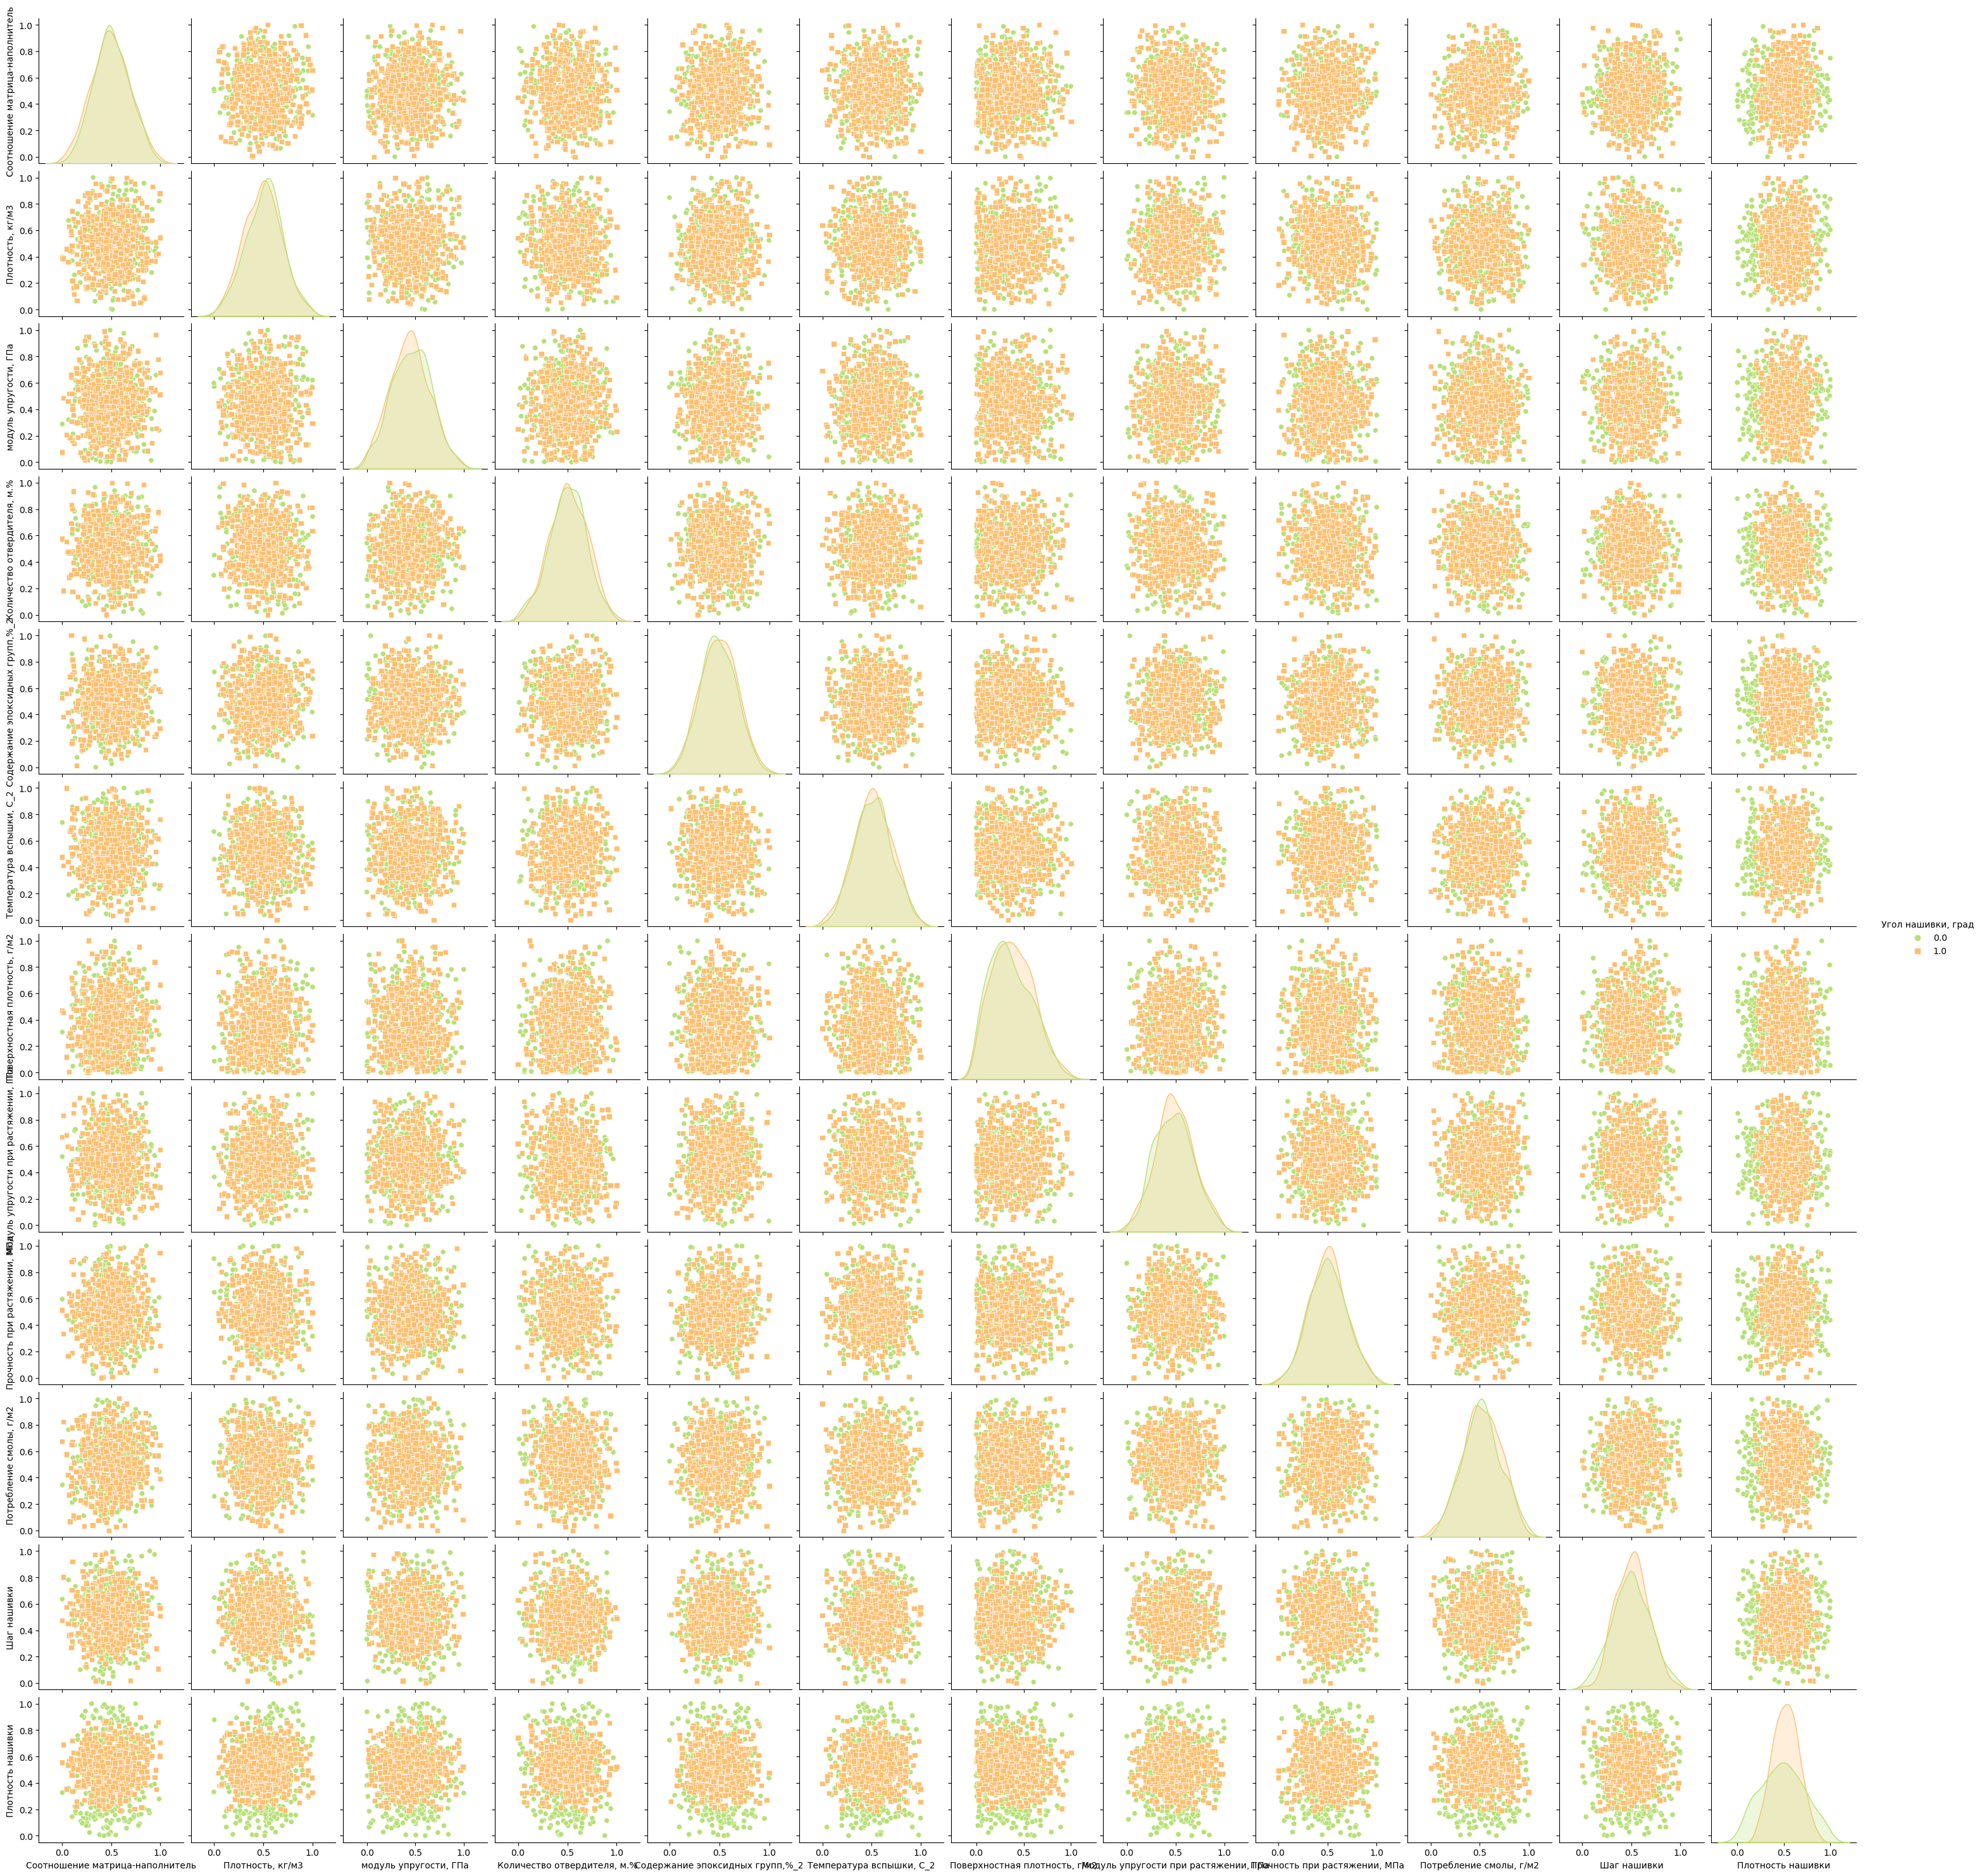

In [67]:
sb.pairplot(minmax, hue = 'Угол нашивки, град', markers = ["o", "s"], diag_kind = 'auto', palette = 'RdYlGn_r')

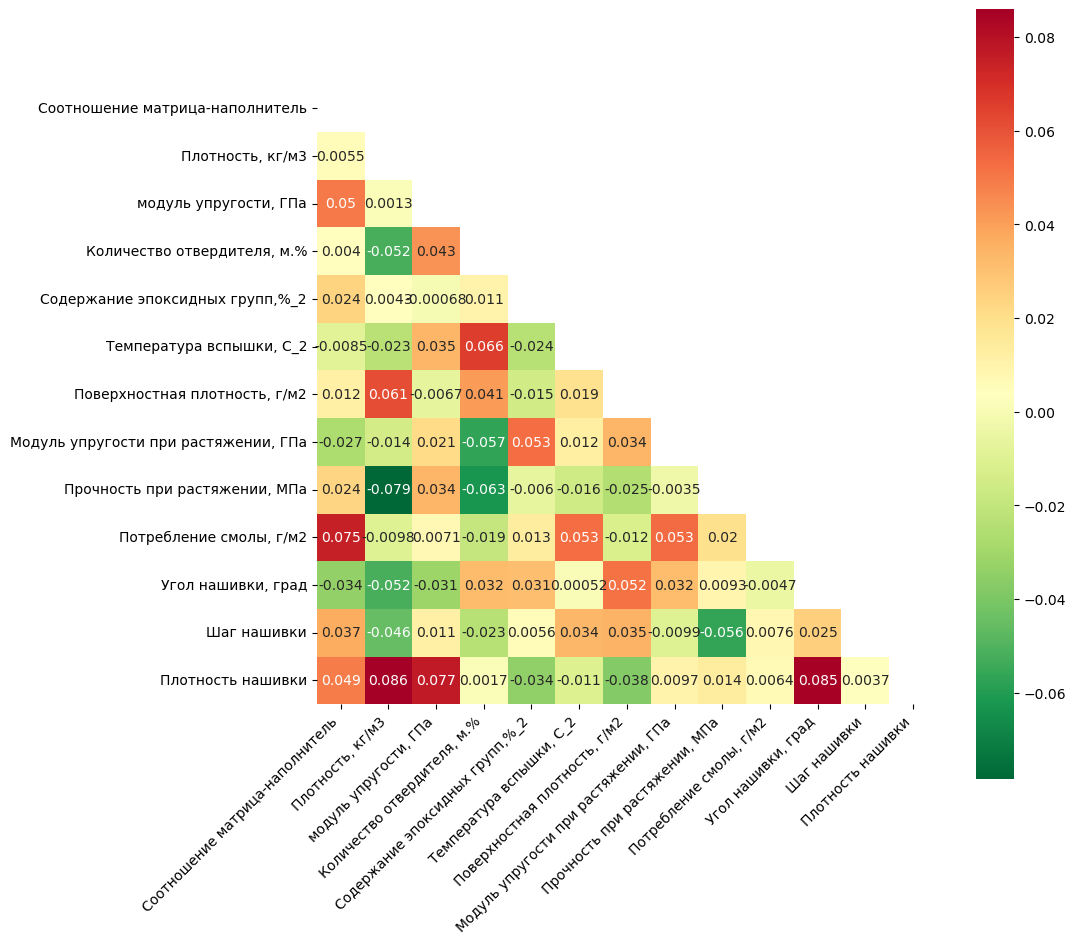

In [68]:
#Тепловая карта по minmax
mask = np.triu(minmax.corr())
f, ax = plt.subplots(figsize = (10, 10))
sb.heatmap(minmax.corr(), mask = mask, annot = True, square = True, cmap = 'RdYlGn_r')
plt.xticks(rotation = 45, ha='right')
plt.show()

In [69]:
#Нормализация данных с помощью Normalizer()
normalizer = Normalizer()
res = normalizer.fit_transform(DataF1_norm)
normal = pd.DataFrame(res, columns = DataF1_norm.columns)
normal

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           0.000499          0.545436               0.198490   
1                           0.000499          0.545011               0.198335   
2                           0.000744          0.544829               0.202097   
3                           0.000746          0.539271               0.201687   
4                           0.000699          0.519919               0.219673   
..                               ...               ...                    ...   
921                         0.000700          0.601751               0.281397   
922                         0.001078          0.641795               0.139227   
923                         0.000953          0.573123               0.121122   
924                         0.001192          0.664667               0.238453   
925                         0.001071          0.531728               0.117381   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                       0.013434                         0.006381   
1                       0.034634                         0.005705   
2                       0.030022                         0.005976   
3                       0.030161                         0.006004   
4                       0.030449                         0.006062   
..                           ...                              ...   
921                     0.026816                         0.006203   
922                     0.045701                         0.006136   
923                     0.032118                         0.006961   
924                     0.045473                         0.006190   
925                     0.036336                         0.007728   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                    0.076473                       0.056424   
1                    0.080543                       0.056380   
2                    0.076388                       0.056362   
3                    0.076742                       0.056623   
4                    0.077475                       0.057164   
..                        ...                            ...   
921                  0.100115                       0.064488   
922                  0.079584                       0.109777   
923                  0.072186                       0.215067   
924                  0.088689                       0.206291   
925                  0.084651                       0.213418   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                0.018808                       0.806064   
1                                0.018793                       0.805435   
2                                0.018787                       0.805167   
3                                0.018874                       0.808906   
4                                0.019055                       0.816627   
..                                    ...                            ...   
921                              0.022531                       0.735908   
922                              0.022828                       0.738938   
923                              0.021716                       0.773775   
924                              0.023812                       0.666248   
925                              0.020902                       0.803417   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                   0.059111            0.000000     0.001075   
1                   0.059065            0.000000     0.001342   
2                   0.059046            0.000000     0.001342   
3                   0.059320            0.000000     0.001348   
4                   0.059886            0.000000     0.001361   
..                       ...                 ...          ...   
921                 0.038535            0.000308     0.002798   
9

In [70]:
min_and_max = DataF1.describe()
min_and_max.loc[['min', 'max']].T

min          max
Соотношение матрица-наполнитель          0.547391     5.314144
Плотность, кг/м3                      1784.482245  2161.565216
модуль упругости, ГПа                    2.436909  1628.000000
Количество отвердителя, м.%             38.668500   181.828448
Содержание эпоксидных групп,%_2         15.695894    28.955094
Температура вспышки, С_2               179.374391   386.067992
Поверхностная плотность, г/м2            0.603740  1291.340115
Модуль упругости при растяжении, ГПа    65.793845    81.203147
Прочность при растяжении, МПа         1250.392802  3660.450210
Потребление смолы, г/м2                 64.524180   359.052220
Угол нашивки, град                       0.000000     1.000000
Шаг нашивки                              0.037639    13.732404
Плотность нашивки                       28.382477    86.012427

In [71]:
min_and_max = normal.describe()
min_and_max.loc[['min', 'max']].T

min       max
Соотношение матрица-наполнитель       0.000163  0.001803
Плотность, кг/м3                      0.444650  0.824241
модуль упругости, ГПа                 0.000709  0.525102
Количество отвердителя, м.%           0.011339  0.062919
Содержание эпоксидных групп,%_2       0.004113  0.010887
Температура вспышки, С_2              0.049402  0.147961
Поверхностная плотность, г/м2         0.000230  0.414371
Модуль упругости при растяжении, ГПа  0.016108  0.030620
Прочность при растяжении, МПа         0.463136  0.877580
Потребление смолы, г/м2               0.017544  0.122973
Угол нашивки, град                    0.000000  0.000419
Шаг нашивки                           0.000011  0.004519
Плотность нашивки                     0.007195  0.030927

<AxesSubplot:ylabel='Density'>

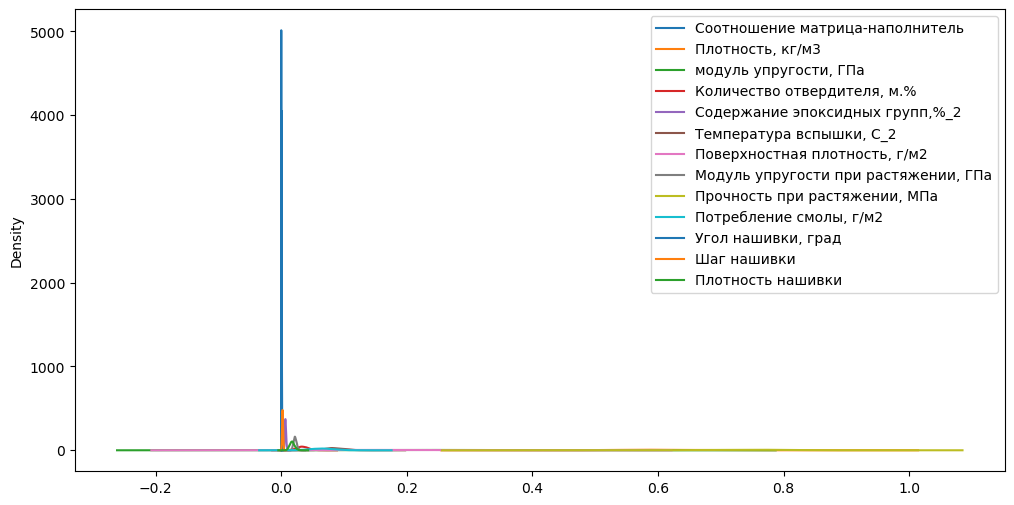

In [72]:
#график плотности распределения
ig, ax = plt.subplots(figsize = (12, 6))
normal.plot(kind = 'kde', ax = ax)

In [73]:
#Выводим первые 3 строки
DataF1_norm.head(3)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        50.00                        23.750000   
1                       129.00                        21.250000   
2                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                284.615385                          210.0   
1                300.000000                          210.0   
2                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               60.0  
1                    220.0                   0          5.0               47.0  
2                    220.0                   0          5.0               57.0

In [74]:
minmax.head(3)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         0.274768          0.651097               0.452951   
1                         0.274768          0.651097               0.452951   
2                         0.466552          0.651097               0.461725   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     0.079153                         0.607435   
1                     0.630983                         0.418887   
2                     0.511257                         0.495653   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.509164                        0.16223   
1                  0.583596                        0.16223   
2                  0.509164                        0.16223   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                              0.272962                       0.725961   
1                              0.272962                       0.725961   
2                              0.272962                       0.725961   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 0.527881                 0.0     0.289334           0.548630  
1                 0.527881                 0.0     0.362355           0.323053  
2                 0.527881                 0.0     0.362355           0.496574

In [75]:
normal.head(3)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         0.000499          0.545436               0.198490   
1                         0.000499          0.545011               0.198335   
2                         0.000744          0.544829               0.202097   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     0.013434                         0.006381   
1                     0.034634                         0.005705   
2                     0.030022                         0.005976   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.076473                       0.056424   
1                  0.080543                       0.056380   
2                  0.076388                       0.056362   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                              0.018808                       0.806064   
1                              0.018793                       0.805435   
2                              0.018787                       0.805167   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 0.059111                 0.0     0.001075           0.016121  
1                 0.059065                 0.0     0.001342           0.012618  
2                 0.059046                 0.0     0.001342           0.015298

In [76]:
#Обратный перевод
result = scaler.inverse_transform(minmax)
initial_DataF1 = pd.DataFrame(result, columns = minmax.columns)
initial_DataF1.head(3)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        50.00                        23.750000   
1                       129.00                        21.250000   
2                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                284.615385                          210.0   
1                300.000000                          210.0   
2                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                 0.0          4.0               60.0  
1                    220.0                 0.0          5.0               47.0  
2                    220.0                 0.0          5.0               57.0

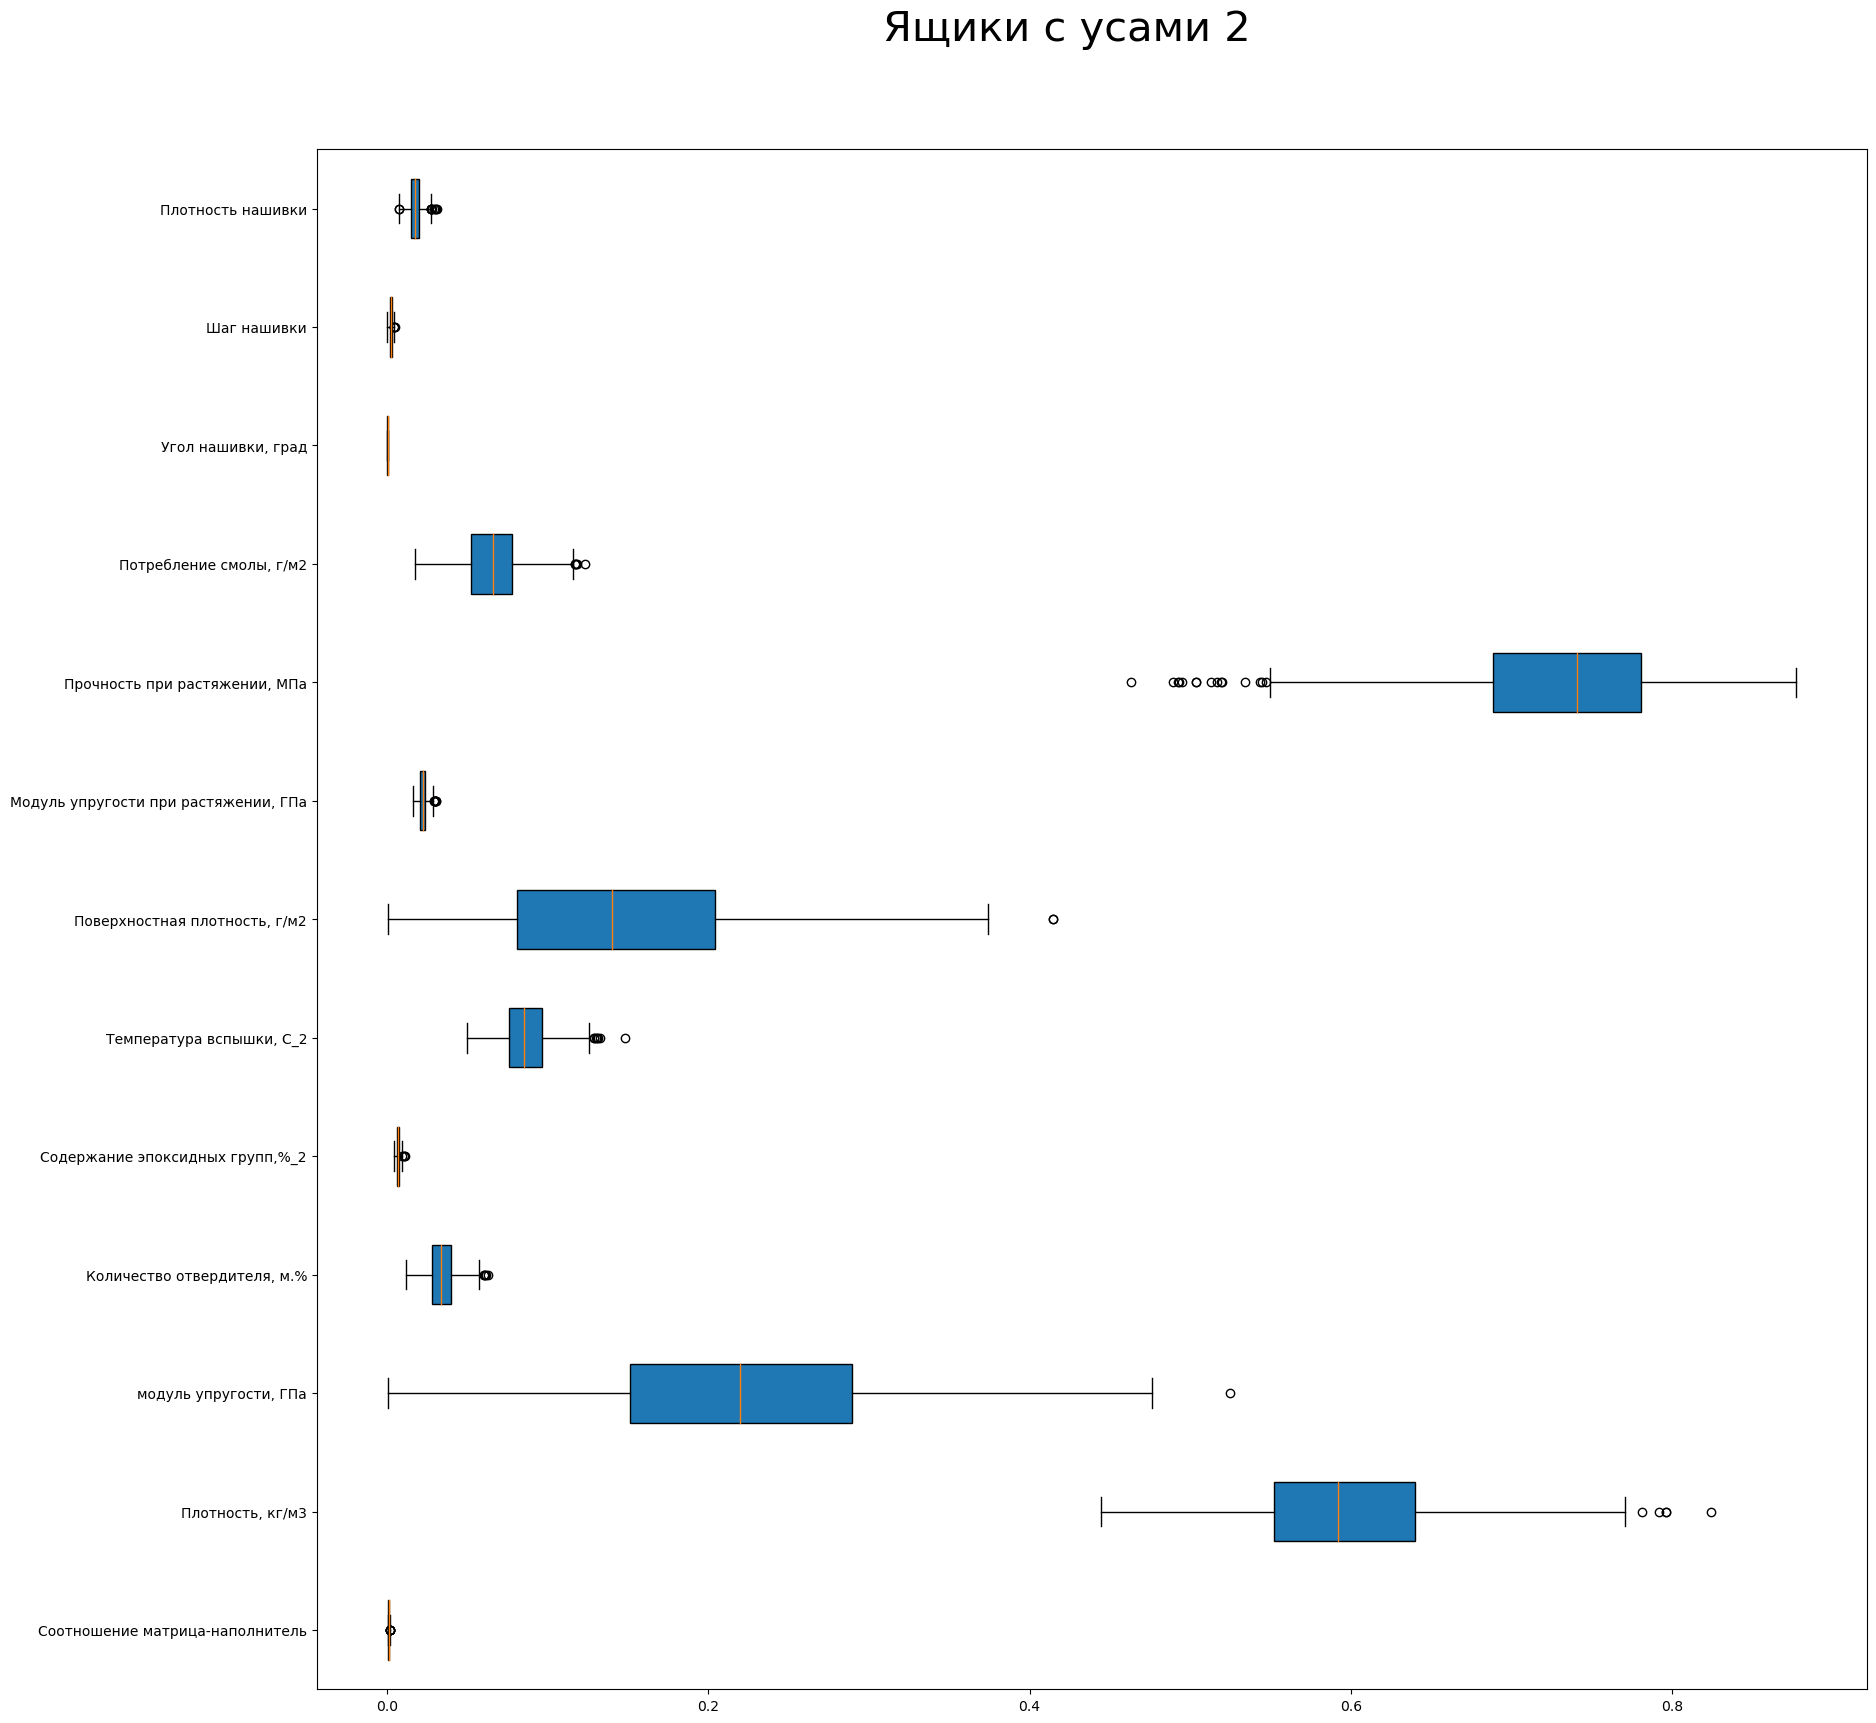

In [77]:
#Ящики с усами 2, очень много выбросов, если стандартизация Normalizer
scaler = Normalizer()
scaler.fit(normal)
plt.figure(figsize = (20, 20))
plt.suptitle('Ящики с усами 2', y = 0.95, fontsize = 30)
plt.boxplot(pd.DataFrame(scaler.transform(normal)),
labels = normal.columns, patch_artist = True, meanline = True, vert = False)
plt.show()

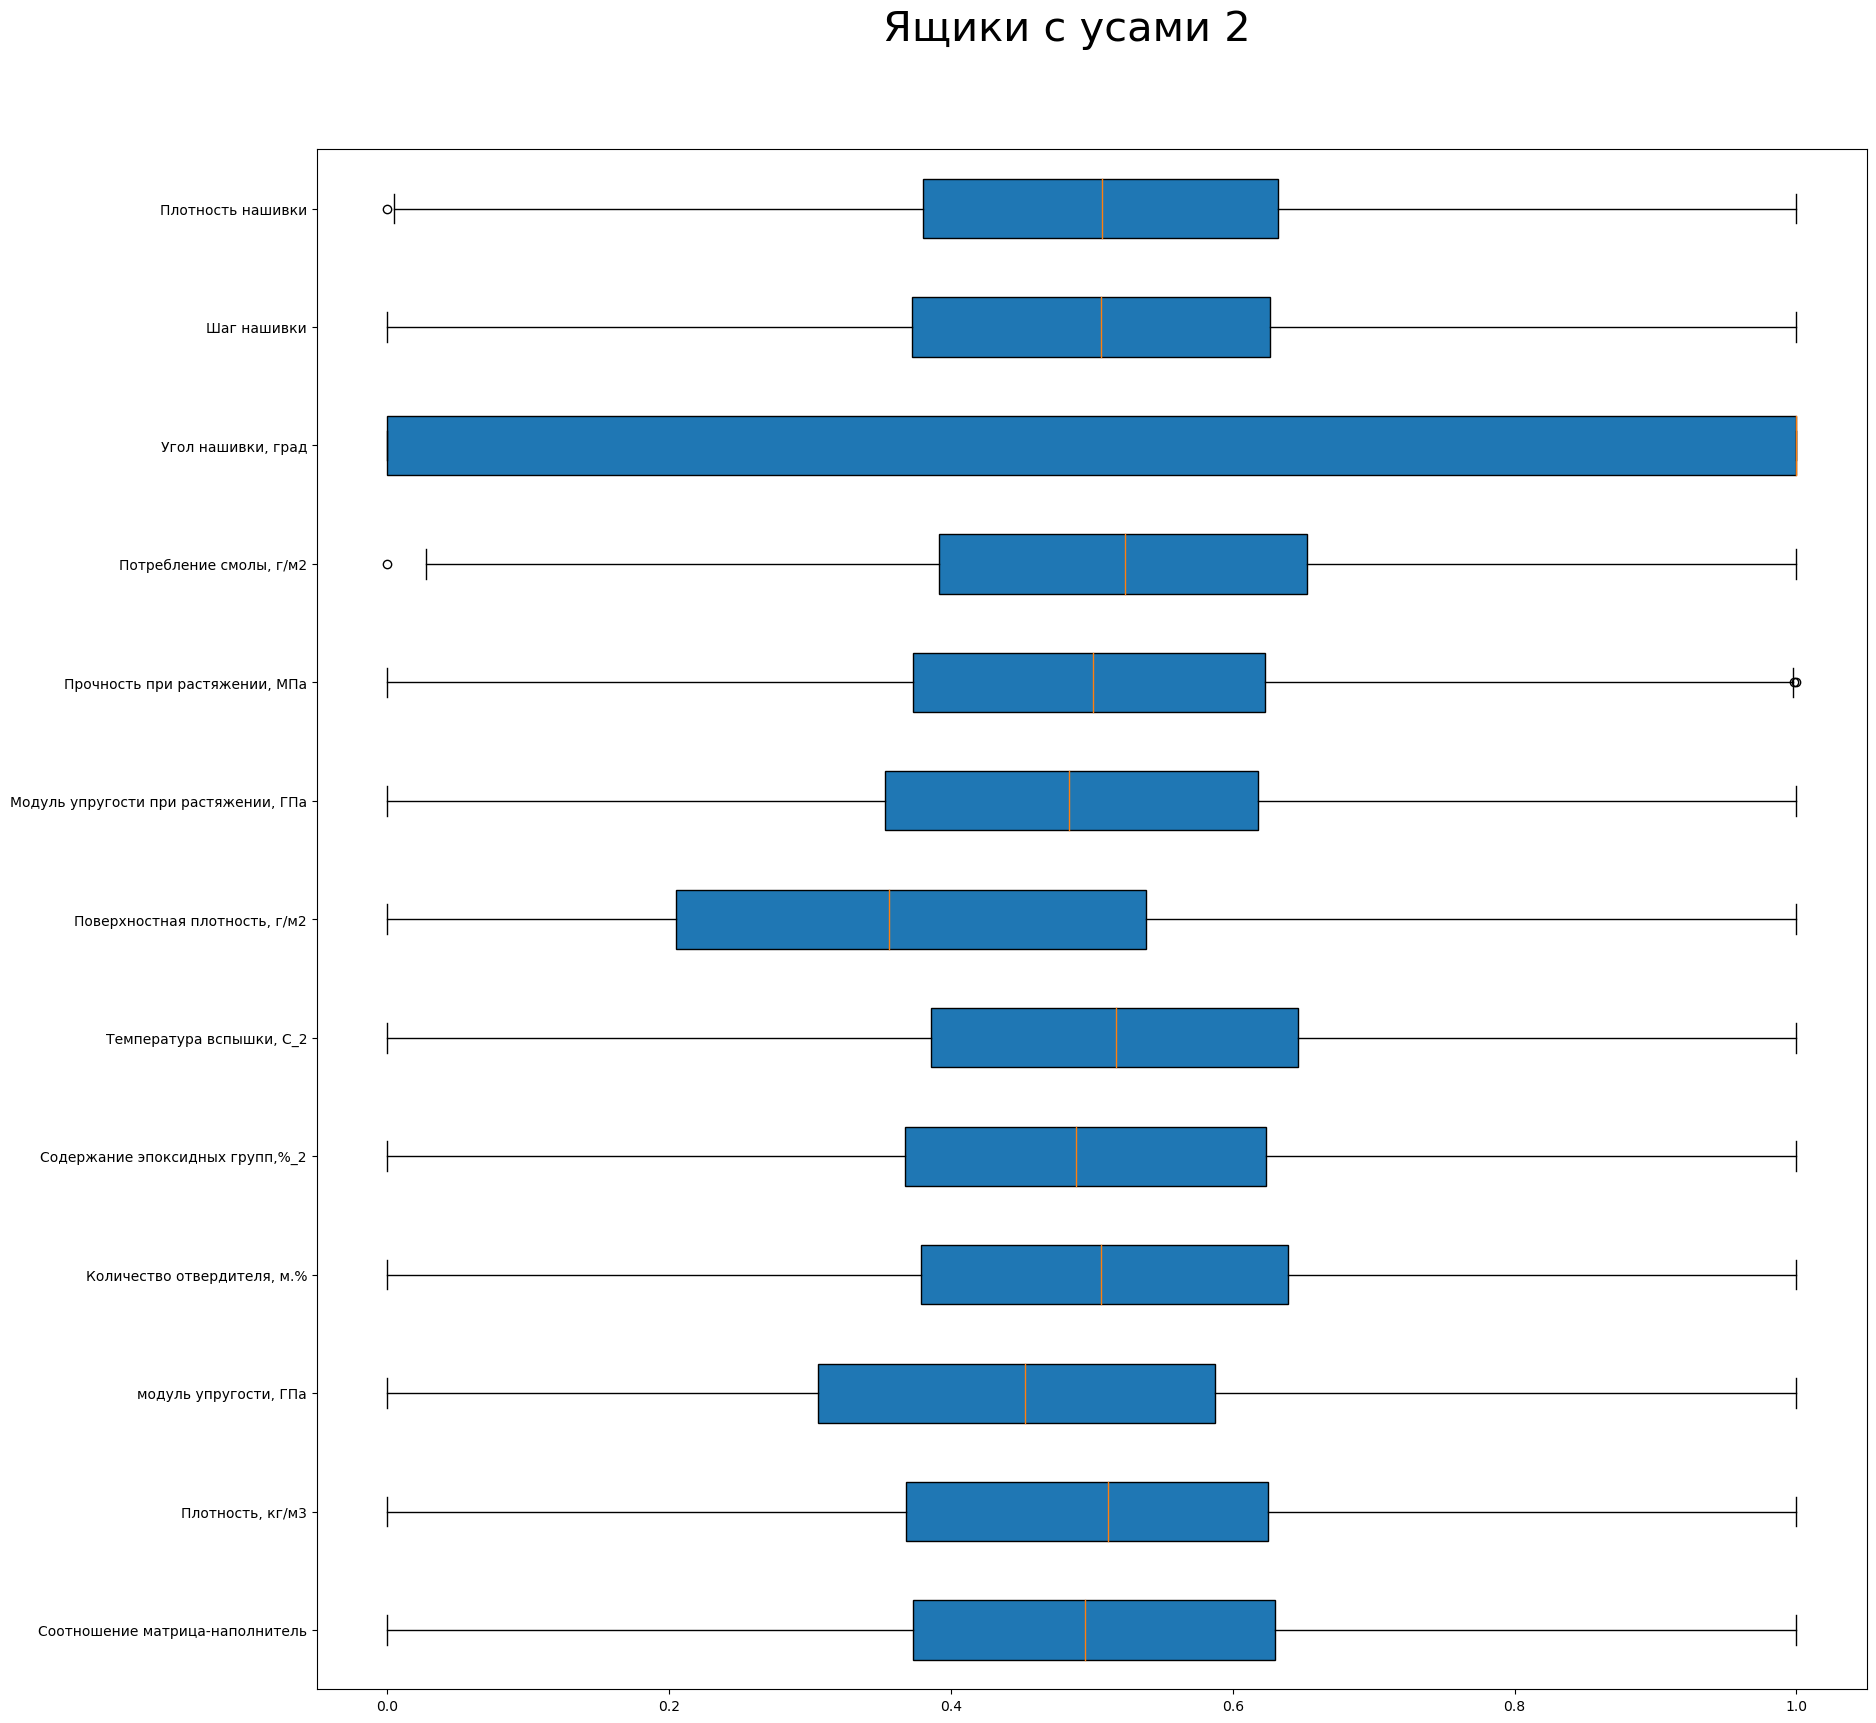

In [78]:
#Ящики с усами 2 min max
scaler = MinMaxScaler()
scaler.fit(minmax)
plt.figure(figsize = (20, 20))
plt.suptitle('Ящики с усами 2', y = 0.95, fontsize = 30)
plt.boxplot(pd.DataFrame(scaler.transform(minmax)),
labels = minmax.columns, patch_artist = True, meanline = True, vert = False)
plt.show()

<AxesSubplot:ylabel='Density'>

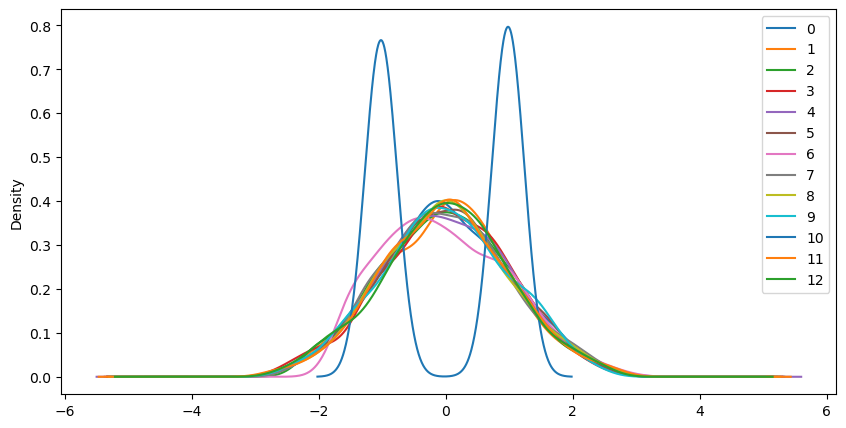

In [79]:
#Стандартизация
st_minmax = DataF1.copy()
st_minmax_res = preprocessing.StandardScaler().fit(st_minmax)
st_minmax_res = st_minmax_res.transform(st_minmax)
st_minmax_res = pd.DataFrame(st_minmax_res)
fig, ax = plt.subplots(figsize = (10, 5))
st_minmax_res.plot(kind = 'kde', ax = ax)

In [80]:
st_minmax_res

0         1         2         3         4         5         6   \
0   -1.198036  0.786865  0.005277 -2.279380  0.645292 -0.038157 -0.974948   
1   -1.198036  0.786865  0.005277  0.663561 -0.400223  0.352042 -0.974948   
2   -0.176491  0.786865  0.048852  0.025055  0.025451 -0.038157 -0.974948   
3   -0.180304  0.364043  0.033577  0.025055  0.025451 -0.038157 -0.974948   
4   -0.401889 -0.904425  0.213827  0.025055  0.025451 -0.038157 -0.974948   
..        ...       ...       ...       ...       ...       ...       ...   
921 -0.735191 -0.311235  0.537224 -0.901331 -0.871437  0.980399 -0.977811   
922  0.575198  1.070004 -0.892931  1.296181 -1.090360 -0.809190 -0.472350   
923  0.392589 -0.025337 -0.978155 -0.024361  0.732071 -0.956101  0.919313   
924  0.867216  1.305524  0.013644  1.125415 -1.237913 -0.262252  0.566738   
925  0.981942 -1.180479 -0.976690  0.670394  2.203011  0.376206  0.985792   

           7         8         9         10        11        12  
0   -1.093521  1.172142  0.034660 -1.019631 -1.164114  0.221016  
1   -1.093521  1.172142  0.034660 -1.019631 -0.766419 -0.946503  
2   -1.093521  1.172142  0.034660 -1.019631 -0.766419 -0.048412  
3   -1.093521  1.172142  0.034660 -1.019631 -0.766419  0.221016  
4   -1.093521  1.172142  0.034660 -1.019631 -0.766419  1.119107  
..        ...       ...       ...       ...       ...       ...  
921 -0.070280 -0.170512 -1.621654  0.980747  0.854734 -0.944728  
922 -0.126601 -0.229459 -1.748547  0.980747  1.446994 -0.340221  
923  0.473751  0.433452  0.324220  0.980747 -1.100024  0.906231  
924  0.244790 -0.862049 -0.364177  0.980747 -0.244167  0.064844  
925  0.333177  0.857309 -0.405531  0.980747 -0.337346  1.786791  

[926 rows x 13 columns]

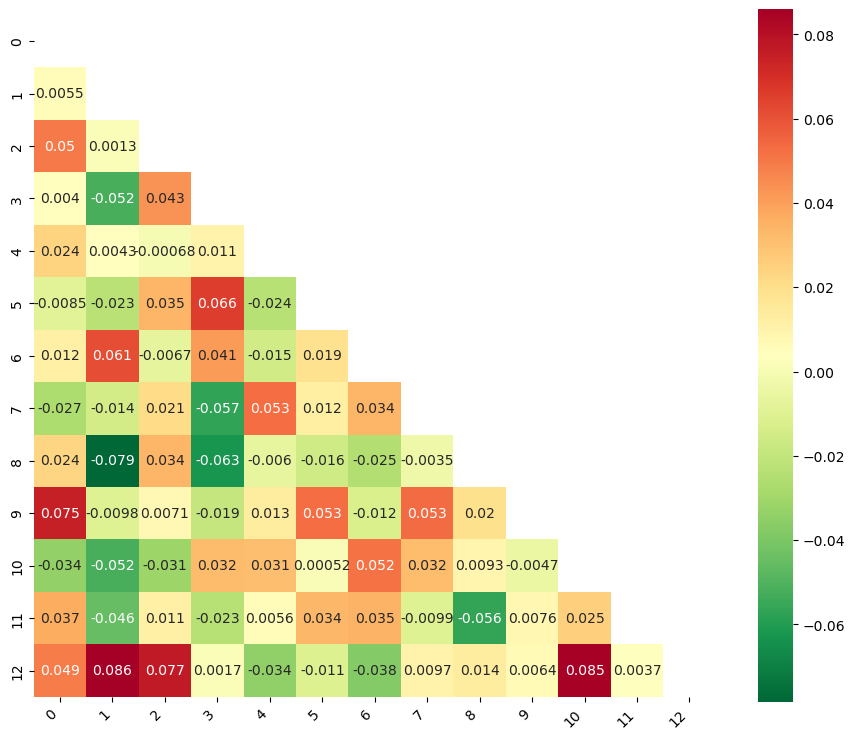

In [81]:
# Визуализация данных после обработки
mask = np.triu(st_minmax_res.corr())
f, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(st_minmax_res.corr(), mask=mask, annot=True, square=True, cmap='RdYlGn_r')
plt.xticks(rotation=45, ha='right')
plt.show()

In [82]:
# Разбиваем на тестовую, тренировочную выборки (Прочность при растяжении)
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    normal.loc[:, normal.columns != 'Прочность при растяжении, МПа'],
    DataF1_norm[['Прочность при растяжении, МПа']],
       test_size = 0.3,
    random_state = 42)

In [83]:
#Функция для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке
def mean_model(y_test_1):
    return [np.mean(y_test_1) for _ in range(len(y_test_1))]
y_1_pred_mean = mean_model(y_test_1)

In [84]:
#Метод К ближайших соседей

In [85]:
loss_df =pd.DataFrame([])

In [86]:
def add_loss(loss_df, model_name, perem, y_pred, y_test):
  MSE = mean_squared_error(y_test, y_pred)
  R2 = r2_score(y_test, y_pred)
  df = pd.DataFrame({'model':model_name,\
                                'target':[perem],\
                                'MSE':MSE,\
                                'R2':R2})
  loss_df = pd.concat([loss_df, df],ignore_index=True)
  return loss_df

In [87]:
# Метод К ближайших соседей
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train_1, y_train_1)
y_pred_knn = knr.predict(x_test_1)
mae_knr = mean_absolute_error(y_pred_knn, y_test_1)
print('K Neighbors Regressor  Results Train:')
print("Score: {:.2f}".format(knr.score(x_train_1, y_train_1)))
print('K Neighbors Regressor  Results:')
print('KNN_MAE: ', round(mean_absolute_error(y_test_1, y_pred_knn)))
print('KNN_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_knn)))
print("Test score: {:.2f}".format(knr.score(x_test_1, y_test_1)))

K Neighbors Regressor  Results Train:
Score: 0.95
K Neighbors Regressor  Results:
KNN_MAE:  106
KNN_MAPE: 0.05
Test score: 0.92


In [88]:
model_name = 'Метод к ближайших соседей'
perem = 'Прочность при растяжении, МПа'
loss_df = add_loss(loss_df,model_name,perem,y_pred_knn,y_test_1)
loss_df

model                         target           MSE  \
0  Метод к ближайших соседей  Прочность при растяжении, МПа  17722.988965   

         R2  
0  0.916561

In [89]:
 #Метод случайного леса

In [90]:
rfr = RandomForestRegressor(n_estimators=15,max_depth=7, random_state=33)
rfr.fit(x_train_1, y_train_1.values)
y_pred_forest = rfr.predict(x_test_1)
mae_rfr = mean_absolute_error(y_pred_forest, y_test_1)
print('Результат:')
print("Score: {:.2f}".format(rfr.score(x_train_1, y_train_1))) 
print('RF_MAE: {:.2f}'.format(mean_absolute_error(y_test_1, y_pred_forest)))
print('RF_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_forest)))
print("Test score: {:.2f}".format(rfr.score(x_test_1, y_test_1)))

Результат:
Score: 0.99
RF_MAE: 75.72
RF_MAPE: 0.03
Test score: 0.95


In [91]:
model_name = 'Метод случайного леса'
perem = 'Прочность при растяжении, МПа'
loss_df = add_loss(loss_df,model_name,perem,y_pred_forest,y_test_1)
loss_df

model                         target           MSE  \
0  Метод к ближайших соседей  Прочность при растяжении, МПа  17722.988965   
1      Метод случайного леса  Прочность при растяжении, МПа  10217.704986   

         R2  
0  0.916561  
1  0.951896

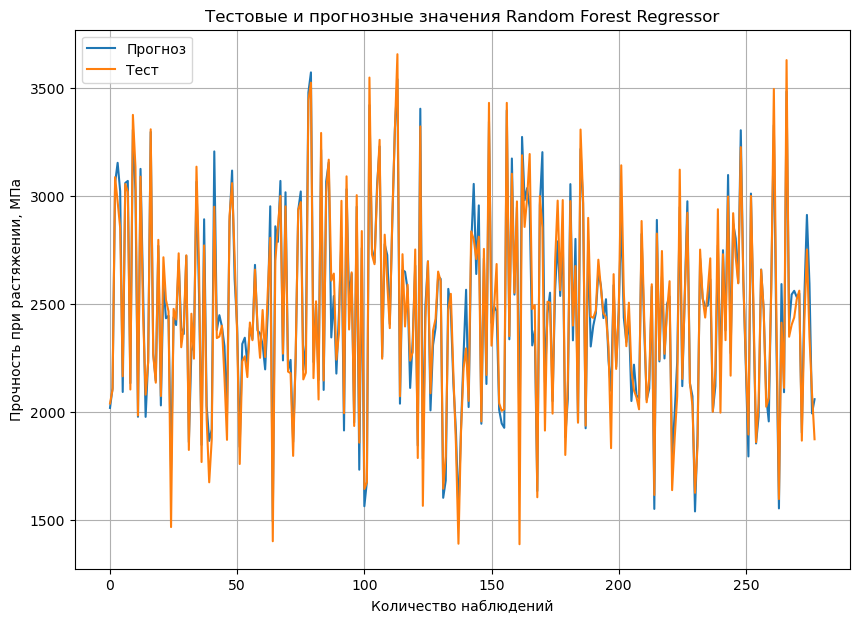

In [92]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y_pred_forest, label = "Прогноз")
plt.plot(y_test_1.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [93]:
#Метод линейной регрессии
lr = LinearRegression()
lr.fit(x_train_1, y_train_1)
y_pred_lr = lr.predict(x_test_1)
mae_lr = mean_absolute_error(y_pred_lr, y_test_1)
print('Резульатат:')
print("Score: {:.2f}".format(lr.score(x_train_1, y_train_1)))
print('lr_MAE: {:.2f}'.format(mean_absolute_error(y_test_1, y_pred_lr)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_lr)))
print("Test score: {:.2f}".format(lr.score(x_test_1, y_test_1)))

Резульатат:
Score: 0.97
lr_MAE: 64.60
lr_MAPE: 0.03
Test score: 0.97


In [94]:
model_name = 'Метод линейной регрессии'
perem = 'Прочность при растяжении, МПа'
loss_df = add_loss(loss_df,model_name,perem,y_pred_lr,y_test_1)
loss_df

model                         target           MSE  \
0  Метод к ближайших соседей  Прочность при растяжении, МПа  17722.988965   
1      Метод случайного леса  Прочность при растяжении, МПа  10217.704986   
2   Метод линейной регрессии  Прочность при растяжении, МПа   6940.273546   

         R2  
0  0.916561  
1  0.951896  
2  0.967326

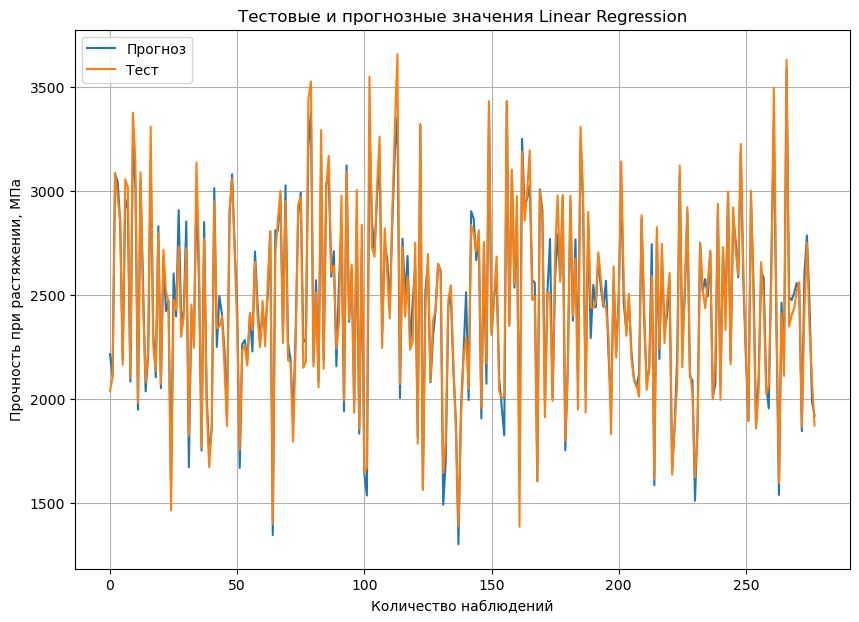

In [95]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Linear Regression")
plt.plot(y_pred_lr, label="Прогноз")
plt.plot(y_test_1.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [96]:
#Метода градиентного бустинга
gbr = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr.fit(x_train_1, np.ravel(y_train_1))
y_pred_gbr = gbr.predict(x_test_1)
mae_gbr = mean_absolute_error(y_pred_gbr, y_test_1)
print('Результат:')
print("Score: {:.2f}".format(gbr.score(x_train_1, y_train_1))) # Скор для тренировочной выборки
print('GBR_MAE: ', round(mean_absolute_error(y_test_1, y_pred_gbr)))
print('GBR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_gbr)))
print("Test score: {:.2f}".format(gbr.score(x_test_1, y_test_1)))# Скор для тестовой выборки


Результат:
Score: 0.99
GBR_MAE:  62
GBR_MAPE: 0.03
Test score: 0.97


In [97]:
model_name = 'Метод градиентного бустинга'
perem = 'Прочность при растяжении, МПа'
loss_df = add_loss(loss_df,model_name,perem,y_pred_gbr,y_test_1)
loss_df

model                         target           MSE  \
0    Метод к ближайших соседей  Прочность при растяжении, МПа  17722.988965   
1        Метод случайного леса  Прочность при растяжении, МПа  10217.704986   
2     Метод линейной регрессии  Прочность при растяжении, МПа   6940.273546   
3  Метод градиентного бустинга  Прочность при растяжении, МПа   6209.921544   

         R2  
0  0.916561  
1  0.951896  
2  0.967326  
3  0.970764

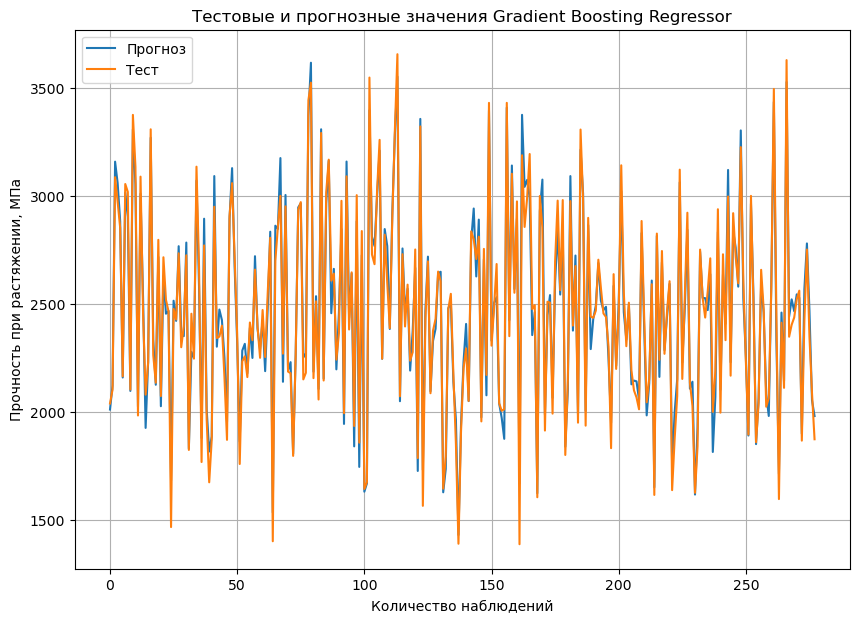

In [98]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Gradient Boosting Regressor")
plt.plot(y_pred_gbr, label = "Прогноз")
plt.plot(y_test_1.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);
#Градиентный бустинг с задачей справился в 97 % случаев.

In [99]:
#Деревья решений 
dtr = DecisionTreeRegressor()
dtr.fit(x_train_1, y_train_1)
y_pred_dtr = dtr.predict(x_test_1)
mae_dtr = mean_absolute_error(y_pred_dtr, y_test_1)
print('Результат:')
print("Score: {:.2f}".format(dtr.score(x_train_1, y_train_1)))
print('DTR_MAE: ', round(mean_absolute_error(y_test_1, y_pred_dtr)))
print('DTR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_dtr)))
print("Test score: {:.2f}".format(dtr.score(x_test_1, y_test_1)))

Результат:
Score: 1.00
DTR_MAE:  106
DTR_MAPE: 0.05
Test score: 0.91


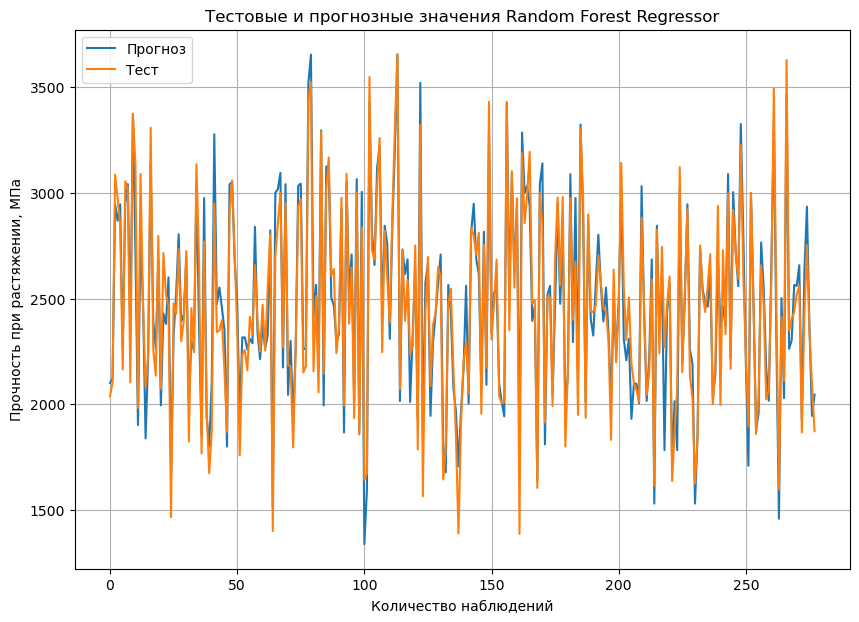

In [100]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y_pred_dtr, label = "Прогноз")
plt.plot(y_test_1.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [101]:
model_name = 'Метод - деревья решений'
perem = 'Прочность при растяжении, МПа'
loss_df = add_loss(loss_df,model_name,perem,y_pred_dtr,y_test_1)
loss_df

model                         target           MSE  \
0    Метод к ближайших соседей  Прочность при растяжении, МПа  17722.988965   
1        Метод случайного леса  Прочность при растяжении, МПа  10217.704986   
2     Метод линейной регрессии  Прочность при растяжении, МПа   6940.273546   
3  Метод градиентного бустинга  Прочность при растяжении, МПа   6209.921544   
4      Метод - деревья решений  Прочность при растяжении, МПа  18119.438647   

         R2  
0  0.916561  
1  0.951896  
2  0.967326  
3  0.970764  
4  0.914695

In [102]:
y_train_1

Прочность при растяжении, МПа
888                    2351.873255
368                    1799.493329
651                    2646.858411
652                    2446.724778
490                    2828.566611
..                             ...
106                    1994.674603
270                    2693.624433
860                    1510.387833
435                    2160.577394
102                    1529.604423

[648 rows x 1 columns]

In [103]:
# Лассо регрессия
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train_1, y_train_1)
y_pred_clf = clf.predict(x_test_1)
mae_clf = mean_absolute_error(y_pred_clf, y_test_1)
print('Результат:')
print("Score: {:.2f}".format(clf.score(x_train_1, y_train_1)))
print('SGD_MAE: ', round(mean_absolute_error(y_test_1, y_pred_clf)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_clf)))
print("Test score: {:.2f}".format(clf.score(x_test_1, y_test_1)))

Результат:
Score: 0.96
SGD_MAE:  78
SGD_MAPE: 0.03
Test score: 0.95


In [104]:
model_name = 'Лaссо'
perem = 'Прочность при растяжении, МПа'
loss_df = add_loss(loss_df,model_name,perem,y_pred_clf,y_test_1)
loss_df

model                         target           MSE  \
0    Метод к ближайших соседей  Прочность при растяжении, МПа  17722.988965   
1        Метод случайного леса  Прочность при растяжении, МПа  10217.704986   
2     Метод линейной регрессии  Прочность при растяжении, МПа   6940.273546   
3  Метод градиентного бустинга  Прочность при растяжении, МПа   6209.921544   
4      Метод - деревья решений  Прочность при растяжении, МПа  18119.438647   
5                        Лaссо  Прочность при растяжении, МПа  10035.227767   

         R2  
0  0.916561  
1  0.951896  
2  0.967326  
3  0.970764  
4  0.914695  
5  0.952755

In [105]:
#Cравнение моделей по МАЕ
mae_df = {'Регрессор': [ 'Случайный лес', 'Линейная регрессия', 'Градиентный бустинг', 'К ближайшие соседи', 'Деревья решений','Лассо'], 'MAE': [ mae_rfr, mae_lr, mae_gbr, mae_knr, mae_dtr, mae_clf]} 

mae_df = pd.DataFrame(mae_df)
mae_df


Регрессор         MAE
0        Случайный лес   75.724864
1   Линейная регрессия   64.595424
2  Градиентный бустинг   62.367539
3   К ближайшие соседи  106.144166
4      Деревья решений  106.477822
5                Лассо   77.964348

In [106]:
#Сравнение ошибок

y2_pred_rfr=rfr.predict(x_train_1)
mae_rfr_tr = mean_absolute_error(y2_pred_rfr, y_train_1)

y2_pred_lr=lr.predict(x_train_1)
mae_lr_tr = mean_absolute_error(y2_pred_lr, y_train_1)

y2_pred_gbr=gbr.predict(x_train_1)
mae_gbr_tr = mean_absolute_error(y2_pred_gbr, y_train_1)

y2_pred_knr=knr.predict(x_train_1)
mae_knr_tr = mean_absolute_error(y2_pred_knr, y_train_1)

y2_pred_dtr=dtr.predict(x_train_1)
mae_dtr_tr = mean_absolute_error(y2_pred_dtr, y_train_1)

y2_pred_clf=clf.predict(x_train_1)
mae_clf_tr = mean_absolute_error(y2_pred_clf, y_train_1)

In [107]:
#Cравнение моделей по МАЕ
mae_df = {'Регрессор': ['Случайный лес', 'Линейная регрессия', 'Градиентный бустинг', 'К ближайшие соседи', 'Деревья решений', 'Лассо'],
 'MAE_Test': [ mae_rfr, mae_lr, mae_gbr, mae_knr, mae_dtr, mae_clf],
 'MAE_Train': [ mae_rfr_tr, mae_lr_tr, mae_gbr_tr, mae_knr_tr, mae_dtr_tr, mae_clf_tr],
 'MAE_Tr%T': [ mae_rfr_tr/mae_rfr, mae_lr_tr/mae_lr, mae_gbr_tr/mae_gbr, mae_knr_tr/mae_knr, mae_dtr_tr/mae_dtr, mae_clf_tr/mae_clf]} 

mae_df = pd.DataFrame(mae_df)
mae_df

Регрессор    MAE_Test  MAE_Train  MAE_Tr%T
0        Случайный лес   75.724864  43.711638  0.577243
1   Линейная регрессия   64.595424  62.063032  0.960796
2  Градиентный бустинг   62.367539  30.525030  0.489438
3   К ближайшие соседи  106.144166  77.720300  0.732215
4      Деревья решений  106.477822   0.000000  0.000000
5                Лассо   77.964348  73.821455  0.946862

In [108]:
#Поиск гиперпараметров.
#Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
# модели случайного леса - Random Forest Regressor - 2

# Создание случайного леса
rfr = RandomForestRegressor(random_state=42)

# Определение параметров для поиска по сетке
parametrs = { 'n_estimators': [200, 300],
              'max_depth': [9, 15],
              'max_features': ['auto'],
              'criterion': ['mse'] }

# Создание объекта GridSearchCV
grid = GridSearchCV(estimator = rfr, param_grid = parametrs, cv = 10)

# Обучение модели с использованием поиска по сетке
grid.fit(x_train_1, y_train_1)

# Вывод наилучших параметров
print(grid.best_params_)

{'criterion': 'mse', 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 200}


In [109]:
#Выводим гиперпараметры для оптимальной модели
print(grid.best_estimator_)
knr_upr = grid.best_estimator_
print(f'R2-score RFR для прочности при растяжении, МПа: {knr_upr.score(x_test_1, y_test_1).round(3)}')
#подставим оптимальные гиперпараметры в нашу модель случайного леса
rfr_grid = RandomForestRegressor(n_estimators = 300, criterion = 'mse', max_depth = 15, max_features = 'auto')
#Обучаем модель
rfr_grid.fit(x_train_1, y_train_1)
    
predictions_rfr_grid = rfr_grid.predict(x_test_1)
#Оцениваем точность на тестовом наборе
mae_rfr_grid = mean_absolute_error(predictions_rfr_grid, y_test_1)
mae_rfr_grid

RandomForestRegressor(criterion='mse', max_depth=15, n_estimators=200,
                      random_state=42)
R2-score RFR для прочности при растяжении, МПа: 0.962


68.6999982493661

In [110]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
# Метода К ближайших соседей - K Neighbors Regressor - 5
knn = KNeighborsRegressor()
knn_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
# Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.
gs = GridSearchCV(knn, knn_params, cv = 10, verbose = 1, n_jobs =-1, scoring = 'r2')
gs.fit(x_train_1, y_train_1)
knn_3 = gs.best_estimator_
gs.best_params_

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


{'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'distance'}

In [111]:
#Выводим гиперпараметры для оптимальной модели
print(gs.best_estimator_)
gs1 = gs.best_estimator_
print(f'R2-score KNR для прочности при растяжении, МПа: {gs1.score(x_test_1, y_test_1).round(3)}')
#подставим оптимальные гиперпараметры в нашу модель метода к ближайших соседей
knn_grid = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 5, weights = 'distance')
#Обучаем модель
knn_grid.fit(x_train_1, y_train_1)

predictions_knn_grid = knn_grid.predict(x_test_1)
#Оцениваем точность на тестовом наборе
mae_knn_grid = mean_absolute_error(predictions_knn_grid, y_test_1)
mae_knn_grid

KNeighborsRegressor(algorithm='brute', weights='distance')
R2-score KNR для прочности при растяжении, МПа: 0.921


103.377777158851

In [112]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
#Деревья решений - Decision Tree Regressor - 6
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter = ['best', 'random']
max_depth = [3,5,7,9,11]
min_samples_leaf = [100,150,200]
min_samples_split = [200,250,300]
max_features = ['auto', 'sqrt', 'log2']
param_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
# Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.
gs4 = GridSearchCV(dtr, param_grid, cv = 10, verbose = 1, n_jobs =-1, scoring = 'r2')
gs4.fit(x_train_1, y_train_1)
dtr_3 = gs4.best_estimator_
gs.best_params_

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


{'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'distance'}

In [113]:
#Выводим гиперпараметры для оптимальной модели
print(gs4.best_estimator_)
gs1 = gs4.best_estimator_
print(f'R2-score DTR для прочности при растяжении, МПа: {gs4.score(x_test_1, y_test_1).round(3)}')

DecisionTreeRegressor(max_depth=7, max_features='auto', min_samples_leaf=100,
                      min_samples_split=200)
R2-score DTR для прочности при растяжении, МПа: 0.811


In [114]:
#подставим оптимальные гиперпараметры в нашу модель метода деревья решений
dtr_grid = DecisionTreeRegressor(criterion = 'poisson', max_depth = 3, max_features = 'auto',
                      min_samples_leaf = 100, min_samples_split = 200)
#Обучаем модель
dtr_grid.fit(x_train_1, y_train_1)

predictions_dtr_grid = dtr_grid.predict(x_test_1)
#Оцениваем точность на тестовом наборе
mae_dtr_grid = mean_absolute_error(predictions_dtr_grid, y_test_1)
mae_dtr_grid

206.4941190584497

In [115]:
dtr2_grid=dtr_grid.predict(x_train_1)
mae2_dtr_grid = mean_absolute_error(dtr2_grid, y_train_1)

knn2_grid=knn_grid.predict(x_train_1)
mae2_knn_grid = mean_absolute_error(knn2_grid, y_train_1)

rfr2_grid=rfr_grid.predict(x_train_1)
mae2_rfr_grid = mean_absolute_error(rfr2_grid, y_train_1)

In [116]:
new_row_in_mae = {'Регрессор': 'Деревья решений_Grid',
'MAE_Test': mae_dtr_grid,
'MAE_Train': mae2_dtr_grid,
'MAE_Tr%T': mae2_dtr_grid/mae_dtr_grid} 
mae_df = mae_df.append(new_row_in_mae, ignore_index = True)

new_row_in_mae = {'Регрессор': 'К ближайшие соседи_Grid',
'MAE_Test': mae_knn_grid,
'MAE_Train': mae2_dtr_grid,
'MAE_Tr%T': mae2_knn_grid/mae_knn_grid} 
mae_df = mae_df.append(new_row_in_mae, ignore_index=True)

new_row_in_mae = {'Регрессор': 'Случайный лес_Grid',
'MAE_Test': mae_rfr_grid,
'MAE_Train': mae2_rfr_grid,
'MAE_Tr%T': mae2_rfr_grid/mae_dtr_grid} 
mae_df = mae_df.append(new_row_in_mae, ignore_index=True)

mae_df

Регрессор    MAE_Test   MAE_Train  MAE_Tr%T
0            Случайный лес   75.724864   43.711638  0.577243
1       Линейная регрессия   64.595424   62.063032  0.960796
2      Градиентный бустинг   62.367539   30.525030  0.489438
3       К ближайшие соседи  106.144166   77.720300  0.732215
4          Деревья решений  106.477822    0.000000  0.000000
5                    Лассо   77.964348   73.821455  0.946862
6     Деревья решений_Grid  206.494119  198.485440  0.961216
7  К ближайшие соседи_Grid  103.377777  198.485440  0.000000
8       Случайный лес_Grid   68.699998   27.302437  0.132219

In [117]:
mae_df['MAE_Tr%T'] = roundplaces = np.round(mae_df['MAE_Tr%T'], decimals = 6) 
mae_df    

Регрессор    MAE_Test   MAE_Train  MAE_Tr%T
0            Случайный лес   75.724864   43.711638  0.577243
1       Линейная регрессия   64.595424   62.063032  0.960796
2      Градиентный бустинг   62.367539   30.525030  0.489438
3       К ближайшие соседи  106.144166   77.720300  0.732215
4          Деревья решений  106.477822    0.000000  0.000000
5                    Лассо   77.964348   73.821455  0.946862
6     Деревья решений_Grid  206.494119  198.485440  0.961216
7  К ближайшие соседи_Grid  103.377777  198.485440  0.000000
8       Случайный лес_Grid   68.699998   27.302437  0.132219

In [118]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('regressor', SVR())])
param_grid = [
{'regressor': [RandomForestRegressor(n_estimators = 100)],'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [LinearRegression()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [GradientBoostingRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [KNeighborsRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [DecisionTreeRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [linear_model.Lasso(alpha = 0.1)], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},]
grid = GridSearchCV(pipe, param_grid, cv = 10)
grid.fit(x_train_1, np.ravel(y_train_1))
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Наилучшее значение правильности перекрестной проверки: {:.2f}".format(grid.best_score_))
print("Правильность на тестовом наборе: {:.2f}".format(grid.score(x_test_1, y_test_1)))
print("Наилучшая модель:\n{}".format(grid.best_estimator_))

Наилучшие параметры:
{'preprocessing': MinMaxScaler(), 'regressor': Lasso(alpha=0.1)}

Наилучшее значение правильности перекрестной проверки: 0.97
Правильность на тестовом наборе: 0.97
Наилучшая модель:
Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('regressor', Lasso(alpha=0.1))])


In [119]:
print("Наилучшая модель:\n{}".format(grid.best_estimator_))

Наилучшая модель:
Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('regressor', Lasso(alpha=0.1))])


In [121]:
#разбиваем на тестовую, тренировочную выборки, выделяя предикторы и целевые переменные
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    normal.loc[:, normal.columns != 'Модуль упругости при растяжении, ГПа'],
    DataF1_norm[['Модуль упругости при растяжении, ГПа']],
       test_size = 0.3,
    random_state = 42)

In [122]:
x_train_2.shape

(648, 12)

In [123]:
st_minmax[['Модуль упругости при растяжении, ГПа']]

Модуль упругости при растяжении, ГПа
0                               70.000000
1                               70.000000
2                               70.000000
3                               70.000000
4                               70.000000
..                                    ...
921                             73.090961
922                             72.920827
923                             74.734344
924                             74.042708
925                             74.309704

[926 rows x 1 columns]

In [124]:
# Функция для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке
def mean_model(y_test_2):
    return [np.mean(y_test_2) for _ in range(len(y_test_2))]
y_2_pred_mean = mean_model(y_test_2)

In [125]:
#Метод опорных векторов
svr2 = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C = 500.0, epsilon = 1.0))
#обучаем модель
svr2.fit(x_train_2, np.ravel(y_train_2))
#вычисляем коэффициент детерминации
y_pred_svr2 = svr2.predict(x_test_2)
mae_svr2 = mean_absolute_error(y_pred_svr2, y_test_2)
print('Support Vector Regression Results Train:') 
print("Score: {:.2f}".format(svr2.score(x_train_2, y_train_2)))
print('Support Vector Regression Results:')
print('SVR_MAE: {:.5f}'.format(mean_absolute_error(y_test_2, y_pred_svr2)))
print('SVR_MAPE: {:.5f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_svr2)))
print("Test score: {:.2f}".format(svr2.score(x_test_2, y_test_2)))
#Результаты модели, выдающей среднее значение
print("MAE for mean target: ", mean_absolute_error(y_test_2, y_2_pred_mean))

Support Vector Regression Results Train:
Score: 0.90
Support Vector Regression Results:
SVR_MAE: 3.44617
SVR_MAPE: 0.04724
Test score: -1.03
MAE for mean target:  2.4458905302866936


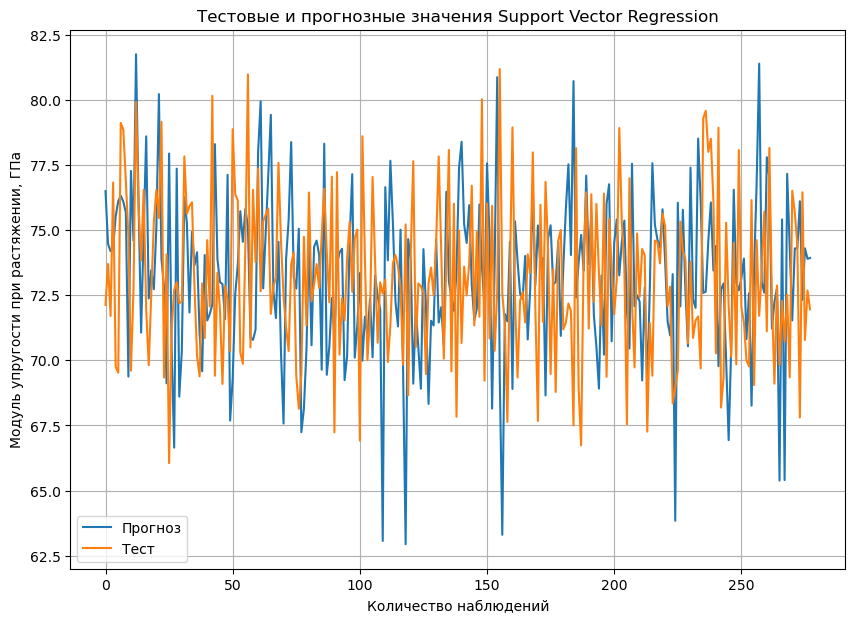

In [126]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Support Vector Regression")
plt.plot(y_pred_svr2, label = "Прогноз")
plt.plot(y_test_2.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Результат:
Score: 0.44
RF_MAE: 2.5469516458
RF_MAPE: 0.0348912694
Test score: -0.0919659356


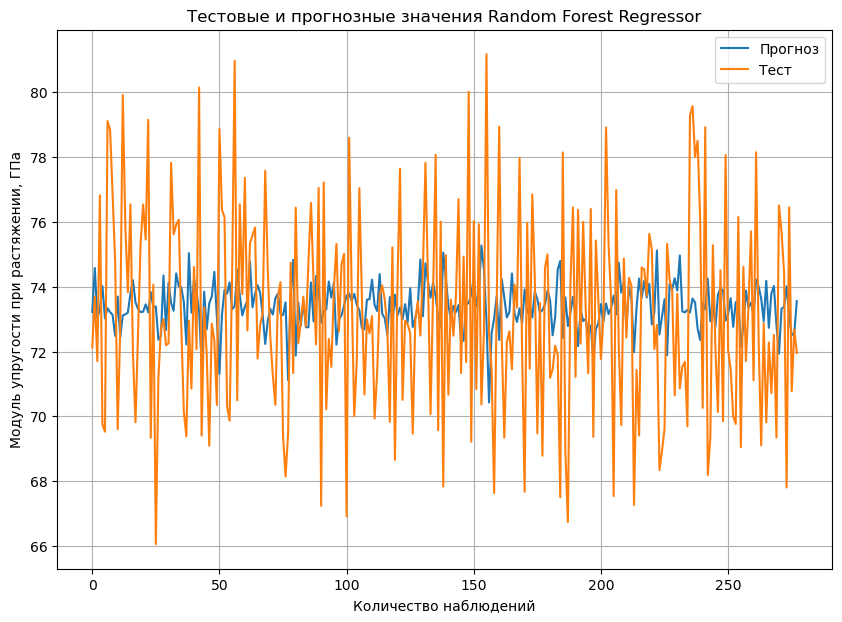

In [127]:
# Метод случайного леса
#построение модели и вузуализация метода случайный лес
rfr2 = RandomForestRegressor(n_estimators = 15,max_depth = 7, random_state = 33)
rfr2.fit(x_train_2, y_train_2.values)
y2_pred_forest = rfr2.predict(x_test_2)
mae_rfr2 = mean_absolute_error(y2_pred_forest, y_test_2)
print('Результат:')
print("Score: {:.2f}".format(rfr2.score(x_train_2, y_train_2)))
print('RF_MAE: {:.10f}'.format(mean_absolute_error(y_test_2, y2_pred_forest)))
print('RF_MAPE: {:.10f}'.format(mean_absolute_percentage_error(y_test_2, y2_pred_forest)))
print("Test score: {:.10f}".format(rfr2.score(x_test_2, y_test_2))) 
plt.figure(figsize=(10, 7))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y2_pred_forest, label = "Прогноз")
plt.plot(y_test_2.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Результат:
Score: 0.015818536681407535660071062011
lr_MAE: 2.462732391521207375717494869605
lr_MAPE: 0.033725064452920519575407354296
Test score: -0.007923859607695371565228015243


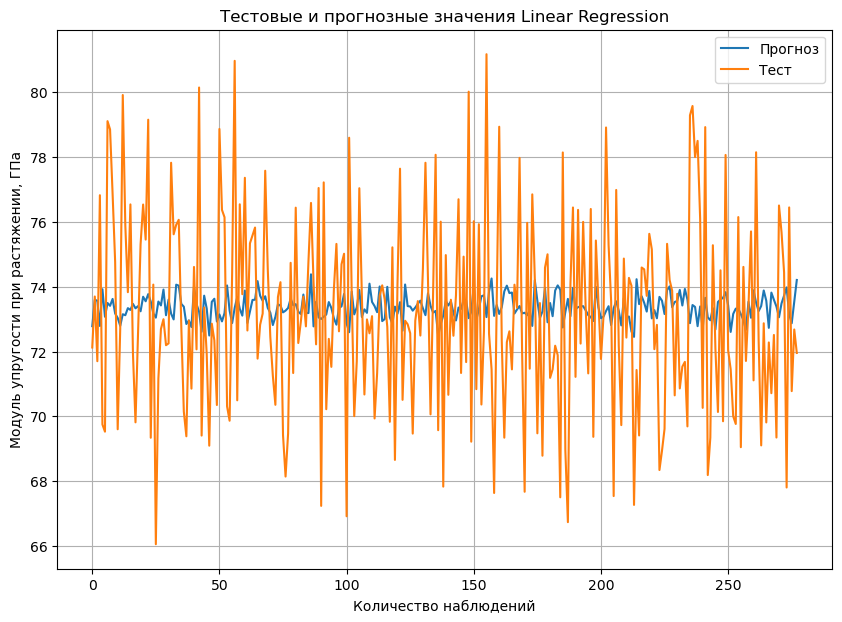

In [128]:
#Метод линейной регрессии
#построение модели и вузуализация Линейной регрессии
lr2 = LinearRegression()
lr2.fit(x_train_2, y_train_2)
y_pred_lr2 = lr2.predict(x_test_2)
mae_lr2 = mean_absolute_error(y_pred_lr2, y_test_2)
print('Результат:')
print("Score: {:.30f}".format(lr2.score(x_train_2, y_train_2)))
print('lr_MAE: {:.30f}'.format(mean_absolute_error(y_test_2, y_pred_lr2)))
print('lr_MAPE: {:.30f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_lr2)))
print("Test score: {:.30f}".format(lr2.score(x_test_2, y_test_2)))
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Linear Regression")
plt.plot(y_pred_lr2, label = "Прогноз")
plt.plot(y_test_2.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Результат:
Score: 0.54
GBR_MAE:  3
GBR_MAPE: 0.04
Test score: -0.15


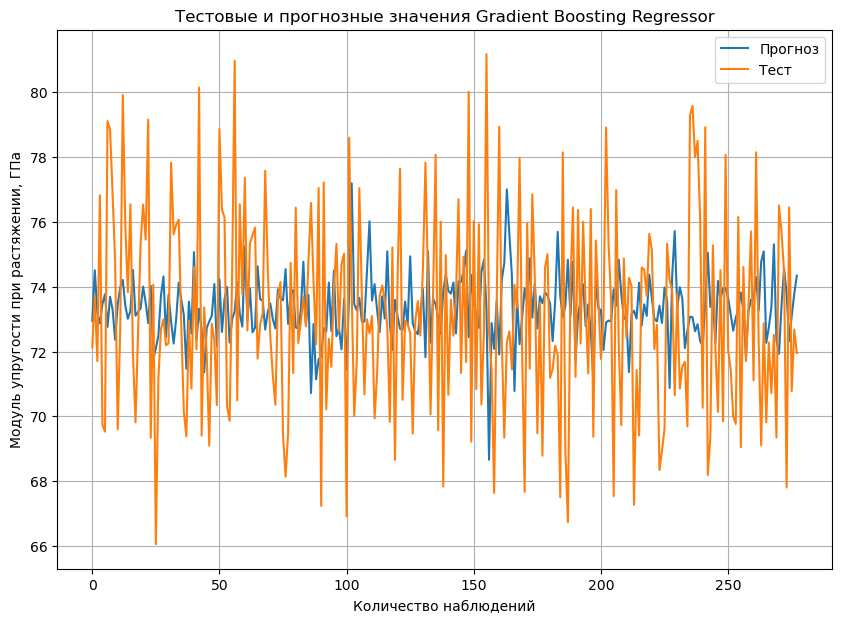

In [129]:
#Метод градиентного бустинга
gbr2 = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr2.fit(x_train_2, np.ravel(y_train_2))
y_pred_gbr2 = gbr2.predict(x_test_2)
mae_gbr2 = mean_absolute_error(y_pred_gbr2, y_test_2)
print('Результат:')
print("Score: {:.2f}".format(gbr2.score(x_train_2, y_train_2))) # Скор для тренировочной выборки
print('GBR_MAE: ', round(mean_absolute_error(y_test_2, y_pred_gbr2)))
print('GBR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_gbr2)))
print("Test score: {:.2f}".format(gbr2.score(x_test_2, y_test_2)))# Скор для тестовой выборки
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Gradient Boosting Regressor")
plt.plot(y_pred_gbr2, label = "Прогноз")
plt.plot(y_test_2.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Результат:
Score: 0.19
KNN_MAE:  3
KNN_MAPE: 0.04
Test score: -0.12


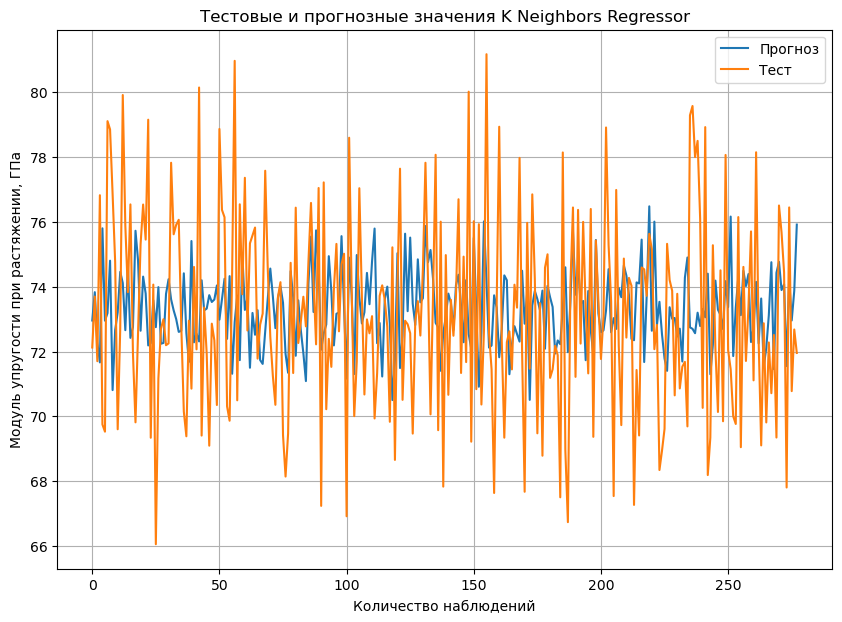

In [130]:
# Метод К ближайших соседей - K Neighbors Regressor - 5
knr2 = KNeighborsRegressor(n_neighbors=5)
knr2.fit(x_train_2, y_train_2)
y_pred_knn2 = knr2.predict(x_test_2)
mae_knr2 = mean_absolute_error(y_pred_knn2, y_test_2)
print('Результат:')
print("Score: {:.2f}".format(knr2.score(x_train_2, y_train_2)))
print('KNN_MAE: ', round(mean_absolute_error(y_test_2, y_pred_knn2)))
print('KNN_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_knn2)))
print("Test score: {:.2f}".format(knr2.score(x_test_2, y_test_2)))# Скор для тестовой выборки
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения K Neighbors Regressor")
plt.plot(y_pred_knn2, label = "Прогноз")
plt.plot(y_test_2.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Результат
Score: 1.00
Decision Tree Regressor Results:
DTR_MAE:  4
DTR_MAPE: 0.05
Test score: -1.24


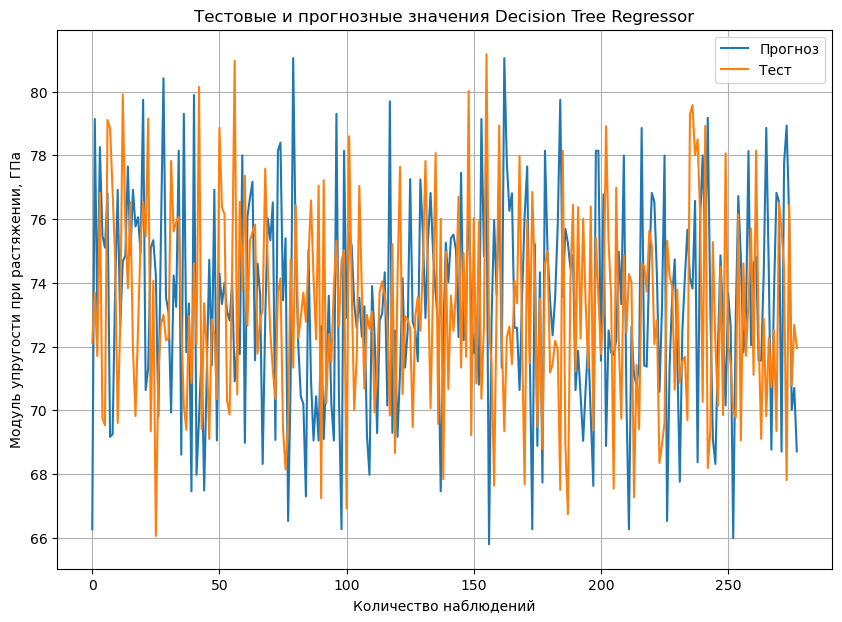

In [131]:
#Деревья решений - Decision Tree Regressor - 6

dtr2 = DecisionTreeRegressor()
dtr2.fit(x_train_2, y_train_2.values)
y_pred_dtr2 = dtr2.predict(x_test_2)
mae_dtr2 = mean_absolute_error(y_pred_dtr2, y_test_2)
print('Результат')
print("Score: {:.2f}".format(dtr2.score(x_train_2, y_train_2)))
print('Decision Tree Regressor Results:')
print('DTR_MAE: ', round(mean_absolute_error(y_test_2, y_pred_dtr2)))
print('DTR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_dtr2)))
print("Test score: {:.2f}".format(dtr2.score(x_test_2, y_test_2)))
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Decision Tree Regressor")
plt.plot(y_pred_dtr2, label = "Прогноз")
plt.plot(y_test_2.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Результат
Score: 0.00
SGD_MAE:  2
SGD_MAPE: 0.03
Test score: -0.00


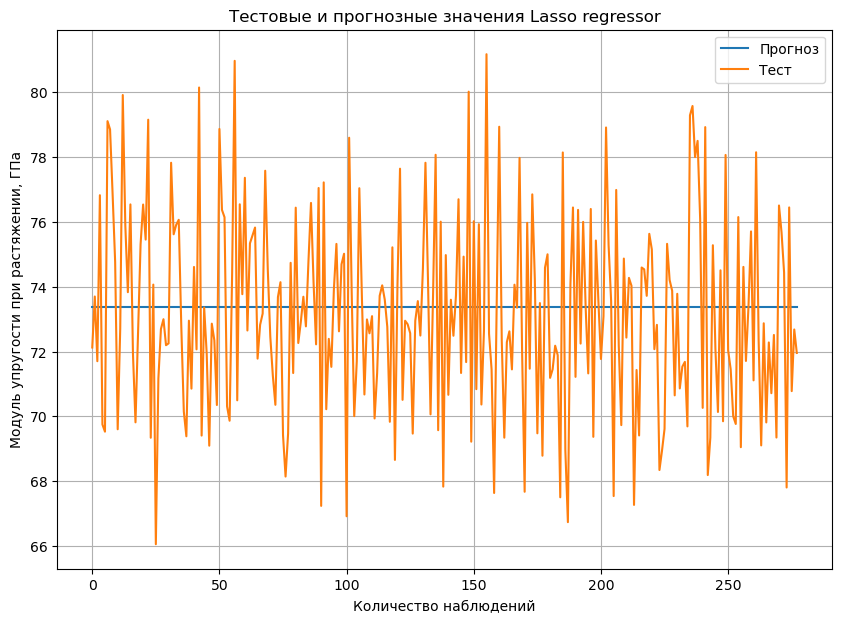

In [132]:
# Лассо регрессия - the Lasso - 9

clf2 = linear_model.Lasso(alpha = 0.1)
clf2.fit(x_train_2, y_train_2)
y_pred_clf2 = clf2.predict(x_test_2)
mae_clf2 = mean_absolute_error(y_pred_clf2, y_test_2)
print('Результат')
print("Score: {:.2f}".format(clf2.score(x_train_2, y_train_2)))
print('SGD_MAE: ', round(mean_absolute_error(y_test_2, y_pred_clf2)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_clf2)))
print("Test score: {:.2f}".format(clf2.score(x_test_2, y_test_2)))
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Lasso regressor")
plt.plot(y_pred_clf2, label = "Прогноз")
plt.plot(y_test_2.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [133]:
y2_pred_svr=svr2.predict(x_train_2)
mae_svr_tr = mean_absolute_error(y2_pred_svr, y_train_2)

y2_pred_rfr=rfr2.predict(x_train_2)
mae_rfr_tr = mean_absolute_error(y2_pred_rfr, y_train_2)

y2_pred_lr=lr2.predict(x_train_2)
mae_lr_tr = mean_absolute_error(y2_pred_lr, y_train_2)

y2_pred_gbr=gbr2.predict(x_train_2)
mae_gbr_tr = mean_absolute_error(y2_pred_gbr, y_train_2)

y2_pred_knr=knr2.predict(x_train_2)
mae_knr_tr = mean_absolute_error(y2_pred_knr, y_train_2)

y2_pred_dtr=dtr2.predict(x_train_2)
mae_dtr_tr = mean_absolute_error(y2_pred_dtr, y_train_2)

y2_pred_clf=clf2.predict(x_train_2)
mae_clf_tr = mean_absolute_error(y2_pred_clf, y_train_2)

In [135]:
#сравним наши модели по метрике МАЕ
mae_df2 = {'Регрессор': ['Опорные вектора', 'Случайный лес', 'Линейная регрессия', 'Градиентный бустинг', 'К ближайшие соседи', 'Деревья решений',  'Лассо'],
'MAE_Test': [mae_svr2, mae_rfr2, mae_lr2, mae_gbr2, mae_knr2, mae_dtr2,  mae_clf2],
'MAE_Train': [mae_svr_tr, mae_rfr_tr, mae_lr_tr, mae_gbr_tr, mae_knr_tr, mae_dtr_tr,  mae_clf_tr],
'MAE_Tr%T': [mae_svr_tr/mae_svr2, mae_rfr_tr/mae_rfr2, mae_lr_tr/mae_lr2, mae_gbr_tr/mae_gbr2, mae_knr_tr/mae_knr2, mae_dtr_tr/mae_dtr2, mae_clf_tr/mae_clf2]} 


mae_df2 = pd.DataFrame(mae_df2)
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
# модели случайного леса - Random Forest Regressor - 2

parametrs = { 'n_estimators': [200, 300],
              'max_depth': [9, 15],
              'max_features': ['auto'],
              'criterion': ['mse'] }
grid2 = GridSearchCV(estimator = rfr2, param_grid  = parametrs, cv=10)
grid2.fit(x_train_2, y_train_2)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=7, n_estimators=15,
                                             random_state=33),
             param_grid={'criterion': ['mse'], 'max_depth': [9, 15],
                         'max_features': ['auto'], 'n_estimators': [200, 300]})

In [136]:
#Поиск гиперпараметров / поиск лучшей модели
mae_df2

Регрессор  MAE_Test  MAE_Train  MAE_Tr%T
0      Опорные вектора  3.446165   0.915154  0.265557
1        Случайный лес  2.546952   1.824824  0.716474
2   Линейная регрессия  2.462732   2.422902  0.983827
3  Градиентный бустинг  2.650260   1.631628  0.615648
4   К ближайшие соседи  2.608872   2.154926  0.825999
5      Деревья решений  3.651859   0.000000  0.000000
6                Лассо  2.461084   2.437003  0.990215

In [137]:
grid2.best_params_

{'criterion': 'mse',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 200}

In [138]:
#Выводим гиперпараметры для оптимальной модели
print(grid2.best_estimator_)
knr_u = grid2.best_estimator_
print(f'R2-score RFR для модуля упругости при растяжении: {knr_u.score(x_test_2, y_test_2).round(3)}')

RandomForestRegressor(criterion='mse', max_depth=9, n_estimators=200,
                      random_state=33)
R2-score RFR для модуля упругости при растяжении: -0.058


In [139]:
#подставим оптимальные гиперпараметры в нашу модель случайного леса
rfr21_grid = RandomForestRegressor(n_estimators=200, criterion='mse', max_depth=15, max_features='auto')
#Обучаем модель
rfr21_grid.fit(x_train_2, y_train_2)

predictions_rfr21_grid = rfr21_grid.predict(x_test_2)
#Оцениваем точность на тестовом наборе
mae_rfr21_grid = mean_absolute_error(predictions_rfr21_grid, y_test_2)
mae_rfr21_grid

2.537224327970334

In [140]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
# Метода К ближайших соседей - K Neighbors Regressor - 5
knn21 = KNeighborsRegressor()
knn21_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
# Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.
gs21 = GridSearchCV(knn21, knn21_params, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
gs21.fit(x_train_2, y_train_2)
knn_21 = gs21.best_estimator_
gs21.best_params_

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


{'algorithm': 'auto', 'n_neighbors': 235, 'weights': 'uniform'}

In [141]:
#Выводим гиперпараметры для оптимальной модели
print(gs21.best_estimator_)
gs121 = gs21.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {gs121.score(x_test_2, y_test_2).round(3)}')

KNeighborsRegressor(n_neighbors=235)
R2-score KNR для модуля упругости при растяжении: -0.002


In [142]:
#подставим оптимальные гиперпараметры в нашу модель метода к ближайших соседей
knn21_grid = KNeighborsRegressor(algorithm = 'brute', n_neighbors = 7, weights = 'distance')
#Обучаем модель
knn21_grid.fit(x_train_2, y_train_2)

predictions_knn21_grid = knn21_grid.predict(x_test_2)
#Оцениваем точность на тестовом наборе
mae_knn21_grid = mean_absolute_error(predictions_knn21_grid, y_test_2)
mae_knn21_grid

2.560574771949153

In [143]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
#Деревья решений - Decision Tree Regressor - 6
criterion21 = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter21 = ['best', 'random']
max_depth21 = [3,5,7,9,11]
min_samples_leaf21 = [100,150,200]
min_samples_split21 = [200,250,300]
max_features21 = ['auto', 'sqrt', 'log2']
param_grid2 = {'criterion': criterion21,
               'splitter': splitter21,
               'max_depth': max_depth21,
               'min_samples_split': min_samples_split21,
               'min_samples_leaf': min_samples_leaf21,
               'max_features': max_features21}
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
# Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.
gs21 = GridSearchCV(dtr2, param_grid2, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
gs21.fit(x_train_2, y_train_2)
dtr_21 = gs21.best_estimator_
gs21.best_params_

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


{'criterion': 'absolute_error',
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 150,
 'min_samples_split': 200,
 'splitter': 'best'}

In [144]:
#Выводим гиперпараметры для оптимальной модели
print(gs21.best_estimator_)
gs21 = gs21.best_estimator_
print(f'R2-score DTR для модуля упругости при растяжении: {gs21.score(x_test_2, y_test_2).round(3)}')

DecisionTreeRegressor(criterion='absolute_error', max_depth=11,
                      max_features='sqrt', min_samples_leaf=150,
                      min_samples_split=200)
R2-score DTR для модуля упругости при растяжении: -0.002


In [145]:
#подставим оптимальные гиперпараметры в нашу модель метода деревья решений
dtr21_grid = DecisionTreeRegressor(criterion='poisson', max_depth=7, max_features='auto',
                      min_samples_leaf=100, min_samples_split=250)
#Обучаем модель
dtr21_grid.fit(x_train_2, y_train_2)

predictions_dtr21_grid = dtr21_grid.predict(x_test_2)
#Оцениваем точность на тестовом наборе
mae_dtr21_grid = mean_absolute_error(predictions_dtr21_grid, y_test_2)
mae_dtr21_grid

2.491361899294113

In [146]:
dtr2_grid=dtr21_grid.predict(x_train_2)
mae2_dtr_grid = mean_absolute_error(dtr2_grid, y_train_2)

knn2_grid=knn21_grid.predict(x_train_2)
mae2_knn_grid = mean_absolute_error(knn2_grid, y_train_2)

rfr2_grid=rfr21_grid.predict(x_train_2)
mae2_rfr_grid = mean_absolute_error(rfr2_grid, y_train_2)

new_row_in_mae = {'Регрессор': 'Деревья решений_Grid',
'MAE_Test': mae_dtr21_grid,
'MAE_Train': mae2_dtr_grid,
'MAE_Tr%T': mae2_dtr_grid/mae_dtr21_grid} 
mae_df2 = mae_df2.append(new_row_in_mae, ignore_index = True)

new_row_in_mae = {'Регрессор': 'К ближайшие соседи_Grid',
'MAE_Test': mae_knn21_grid,
'MAE_Train': mae2_dtr_grid,
'MAE_Tr%T': mae2_knn_grid/mae_knn21_grid} 
mae_df2 = mae_df2.append(new_row_in_mae, ignore_index=True)

new_row_in_mae = {'Регрессор': 'Случайный лес_Grid',
'MAE_Test': mae_rfr21_grid,
'MAE_Train': mae2_rfr_grid,
'MAE_Tr%T': mae2_rfr_grid/mae_dtr21_grid} 
mae_df2 = mae_df2.append(new_row_in_mae, ignore_index=True)

mae_df2

Регрессор  MAE_Test  MAE_Train      MAE_Tr%T
0          Опорные вектора  3.446165   0.915154  2.655572e-01
1            Случайный лес  2.546952   1.824824  7.164739e-01
2       Линейная регрессия  2.462732   2.422902  9.838265e-01
3      Градиентный бустинг  2.650260   1.631628  6.156482e-01
4       К ближайшие соседи  2.608872   2.154926  8.259991e-01
5          Деревья решений  3.651859   0.000000  0.000000e+00
6                    Лассо  2.461084   2.437003  9.902152e-01
7     Деревья решений_Grid  2.491362   2.402597  9.643711e-01
8  К ближайшие соседи_Grid  2.560575   2.402597  4.352446e-07
9       Случайный лес_Grid  2.537224   1.039408  4.172048e-01

In [147]:
mae_df2['MAE_Tr%T'] = roundplaces = np.round(mae_df2['MAE_Tr%T'], decimals = 6)
mae_df2['MAE_Train'] = roundplaces = np.round(mae_df2['MAE_Train'], decimals = 6) 
mae_df2['MAE_Test'] = roundplaces = np.round(mae_df2['MAE_Test'], decimals = 6)  
mae_df2 

Регрессор  MAE_Test  MAE_Train  MAE_Tr%T
0          Опорные вектора  3.446165   0.915154  0.265557
1            Случайный лес  2.546952   1.824824  0.716474
2       Линейная регрессия  2.462732   2.422902  0.983827
3      Градиентный бустинг  2.650260   1.631628  0.615648
4       К ближайшие соседи  2.608872   2.154926  0.825999
5          Деревья решений  3.651859   0.000000  0.000000
6                    Лассо  2.461084   2.437003  0.990215
7     Деревья решений_Grid  2.491362   2.402597  0.964371
8  К ближайшие соседи_Grid  2.560575   2.402597  0.000000
9       Случайный лес_Grid  2.537224   1.039408  0.417205

In [148]:
pipe2 = Pipeline([('preprocessing', StandardScaler()), ('regressor', SVR())])
param_grid2 = [
{'regressor': [SVR()], 'preprocessing': [StandardScaler(), MinMaxScaler(), None],
'regressor__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
'regressor__C': [0.001, 0.01, 0.1, 1, 10, 100]},
{'regressor': [RandomForestRegressor(n_estimators=100)],
'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [LinearRegression()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [GradientBoostingRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [KNeighborsRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [DecisionTreeRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [linear_model.Lasso(alpha=0.1)], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},]
grid2 = GridSearchCV(pipe2, param_grid2, cv=10)
grid2.fit(x_train_2, np.ravel(y_train_2))
print("Наилучшие параметры:\n{}\n".format(grid2.best_params_))
print("Наилучшее значение правильности перекрестной проверки: {:.2f}".format(grid2.best_score_))
print("Правильность на тестовом наборе: {:.2f}".format(grid2.score(x_test_2, y_test_2)))
print("Наилучшая модель:\n{}".format(grid2.best_estimator_))

Наилучшие параметры:
{'preprocessing': MinMaxScaler(), 'regressor': SVR(C=10, gamma=100), 'regressor__C': 10, 'regressor__gamma': 100}

Наилучшее значение правильности перекрестной проверки: -0.00
Правильность на тестовом наборе: -0.00
Наилучшая модель:
Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('regressor', SVR(C=10, gamma=100))])
